# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Modles

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

## 1.2 Read Data

In [2]:
# ipath= "./data/NCDC/us/baltimore/dat.txt" # time too short

# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # 4?
# ipath= './data/NCDC/uk/middle_wallop/dat.txt' # good
# ipath= './data/NCDC/uk/southhamption/dat.txt' # high 0
# ipath= './data/NCDC/uk/bournemouth/dat.txt' 4?
ipath= './data/NCDC/uk/tiree/dat.txt'  # try 4
# ipath= "./data/NCDC/uk/bealach_na_ba/dat.txt" # 
# ipath= "./data/NCDC/uk/skye_lusa/dat.txt" # 
# ipath= "./data/NCDC/uk/south_uist_range/dat.txt" 
# ipath= './data/NCDC/uk/marham/dat.txt' 
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?

# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # 4 or 5?
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # 
# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # 2010-2014 has problem
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good

# ipath= "./data/NCDC/canada/melita_man/dat.txt" # 
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt" # uptail wind speed 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/argentia/dat.txt" 

# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good, can try 4
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak, initial speed (should be good with m/s)
# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed (should be good with m/s)
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; very good
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer with less data, use m/s
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # some directions are blocked

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" # high 0
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0
# ipath= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Weird KDE shape, 4?
# ipath= "./data/NCDC/oceania/canberra/dat.txt" # high 0

# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= "./data/NCDC/cn/tianjing/binhai/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/tianjing/tianjing/dat.txt" # 16 sectors
# ipath= "./data/NCDC/cn/hefei_luogang/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" 
# ipath= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# ipath= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # fit is not good
# ipath= "./data/NCDC/cn/nanning_wuxu/dat.txt" # recent 5 year has problem
# ipath= './data/NCDC/cn/macau/dat.txt'  
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # few initial data

# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

# uipath = unicode(ipath , "utf8")
uipath = ipath

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20160000) ")

D:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


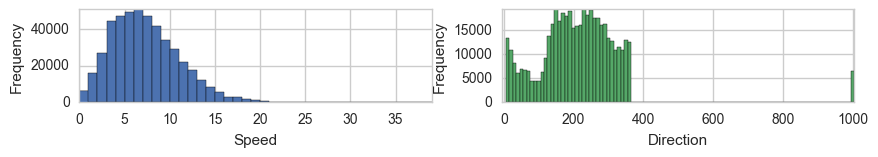

In [4]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [5]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

date           HrMn            dir          speed  \
count  4.703340e+05  470334.000000  470334.000000  470334.000000   
mean   2.000300e+07    1153.105529     205.386744       7.283531   
std    1.127487e+05     669.378092     128.859325       3.840740   
min    1.979010e+07       0.000000       0.000000       0.000000   
25%    1.990101e+07     600.000000     130.000000       4.600000   
50%    2.002061e+07    1120.000000     200.000000       6.700000   
75%    2.011052e+07    1700.000000     270.000000       9.800000   
max    2.015123e+07    2350.000000     999.000000      38.600000   

               month   dir_windrose  
count  470334.000000  470334.000000  
mean        6.562462     205.010760  
std         3.449571     133.522418  
min         1.000000       0.000000  
25%         4.000000     140.000000  
50%         7.000000     200.000000  
75%        10.000000     270.000000  
max        12.000000     999.000000

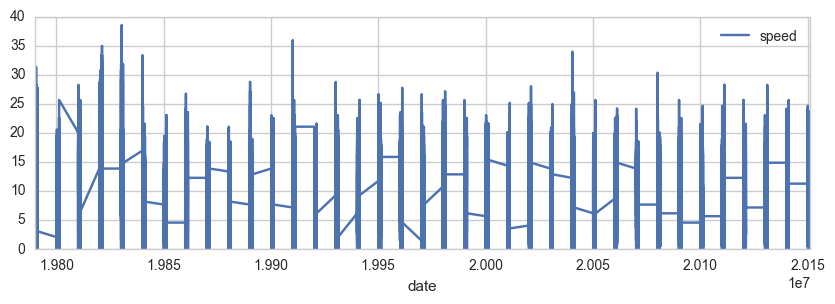

In [6]:
df.plot(x='date', y='speed',legend=True,figsize=(10,3))

### 1.2.1 Unit Detection

True


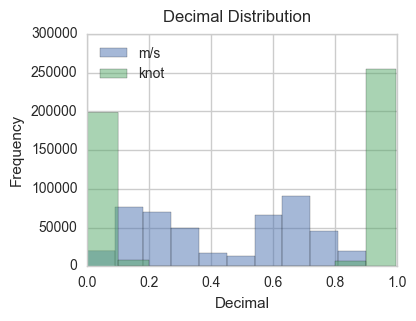

In [7]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False

# knot_unit = False

if knot_unit:
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    df['speed'] = df['speed'].apply(lambda x: int(round(x)))
plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')

print(knot_unit)

### 1.2.2 Sampling Type Selection

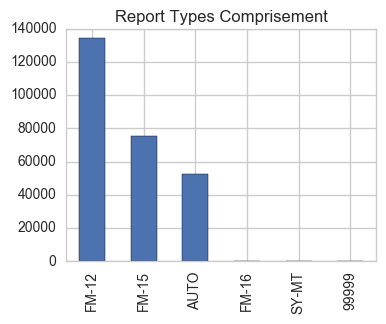

In [8]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

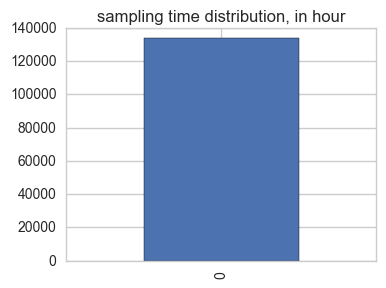

In [9]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution, in hour', figsize=(4,3))

# Need more elaboration
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# sample_times =  [sample_times.index[0]]
df = df.query("sample_time in @sample_times")
df.drop(['sample_time'], 1,inplace=True)

In [10]:
df['HrMn'].value_counts().sort_index()

0       12808
100     12822
200     12815
300     12886
400     12847
500     12821
600     12879
700     12630
800     12191
900     11708
1000    11228
1100    11225
1200    11571
1300    11792
1400    12068
1500    12481
1600    12625
1700    12713
1800    12844
1900    12798
2000    12803
2100    12909
2200    12834
2300    12834
Name: HrMn, dtype: int64

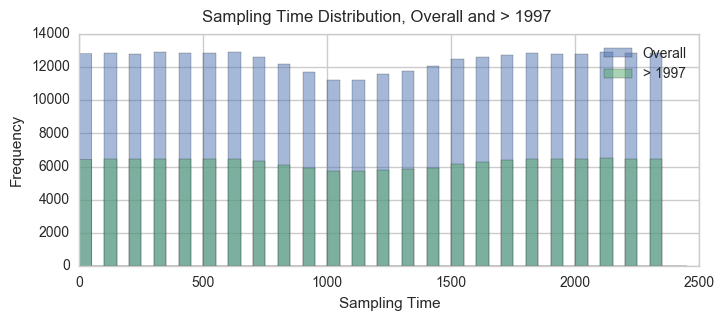

In [11]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(0, 2400+100, 50)

df['HrMn'].plot(kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

## 1.3 Data Wrangling

### 1.3.1 Artefacts

#### 1.3.1.1 wrong direction record

In [12]:
display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose, decimal]
Index: []

#### 1.3.1.2 sudden increase in speed

date  HrMn   type  dir  speed wind_type  month  dir_windrose  \
120455  19910103   600  FM-12  200     70         N      1           250   
253470  20040421  1100  FM-12  290     66         N      4           160   
44291   19831018  1400  FM-12  210     61         N     10           240   
3032    19790509   100  FM-12  140     61         N      5           310   
97226   19890213  1500  FM-12  160     56         N      2           290   
146657  19930121  2100  FM-12  180     56         N      1           270   
367283  20111208  1400  FM-12  180     55         N     12           270   
3702    19790606   400  FM-12  250     55         N      6           200   
18751   19810227   400  FM-12  320     55         N      2           130   
146499  19930117   500  FM-12  180     55         N      1           270   

         decimal  incre  incre_reverse  
120455  0.978420   44.0           46.0  
253470  0.090730   33.0           32.0  
44291   0.036733   31.0           24.0  
3032    0.036733   45.0           48.0  
97226   0.982736    6.0            6.0  
146657  0.982736    8.0            6.0  
367283  0.010814    3.0            6.0  
3702    0.010814   49.0           48.0  
18751   0.010814   19.0           22.0  
146499  0.010814   12.0            3.0

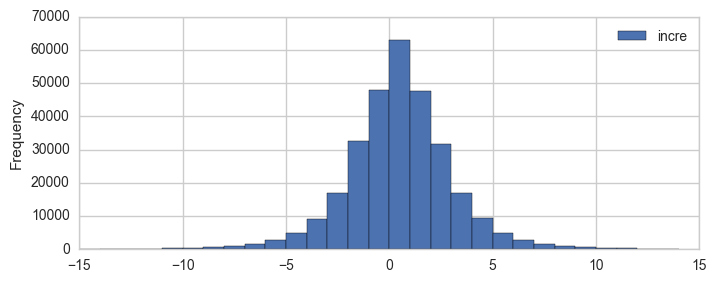

In [13]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [14]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 22


After Simple Aretefacts Handling

In [15]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

date  HrMn   type  dir  speed wind_type  month  dir_windrose  \
146657  19930121  2100  FM-12  180     56         N      1           270   
97226   19890213  1500  FM-12  160     56         N      2           290   
146499  19930117   500  FM-12  180     55         N      1           270   
367283  20111208  1400  FM-12  180     55         N     12           270   
18751   19810227   400  FM-12  320     55         N      2           130   
47032   19840121  1900  FM-12  310     54         N      1           140   
8326    19791217   100  FM-12  210     54         N     12           240   
367281  20111208  1200  FM-12  190     54         N     12           260   
8325    19791217     0  FM-12  210     53         N     12           240   
292545  20080109   500  FM-12  170     53         N      1           280   

         decimal  incre  incre_reverse  
146657  0.982736    8.0            6.0  
97226   0.982736    6.0            6.0  
146499  0.010814   12.0            3.0  
367283  0.010814    3.0            6.0  
18751   0.010814   19.0           22.0  
47032   0.038891    4.0            2.0  
8326    0.038891    1.0            2.0  
367281  0.038891    2.0            2.0  
8325    0.066969    1.0           -1.0  
292545  0.872584   13.0           15.0

### 1.3.2 Direction re-aligment and 999
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [16]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
SECTOR_LENGTH = 360/len(effective_column)
print(len(effective_column), SECTOR_LENGTH)

0       2844
10      2774
20      4149
30      4400
40      4500
50      3914
60      5092
70      6598
80      8572
90      8342
100     8554
110     7151
120     7541
130     6931
140     7978
150     8396
160    10301
170    10061
180    10951
190    11003
200    12180
210    11258
220    12002
230    10130
240    10149
250     9770
260    11952
270    11010
280    11943
290    10906
300    12159
310    10136
320     8728
330     5788
340     4119
350     2792
999     4033
Name: dir, dtype: int64

36 10.0


In [17]:
df=realign_direction(df, effective_column)

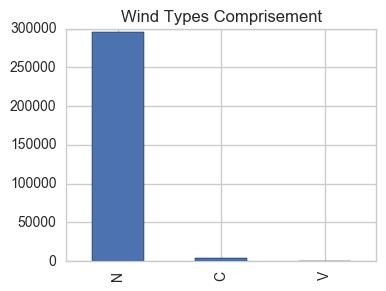

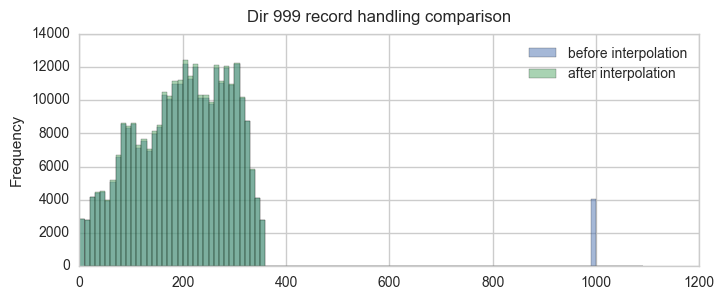

In [18]:
df=fill_direction_999(df, SECTOR_LENGTH)

### 1.3.3 Time Shift Comparison

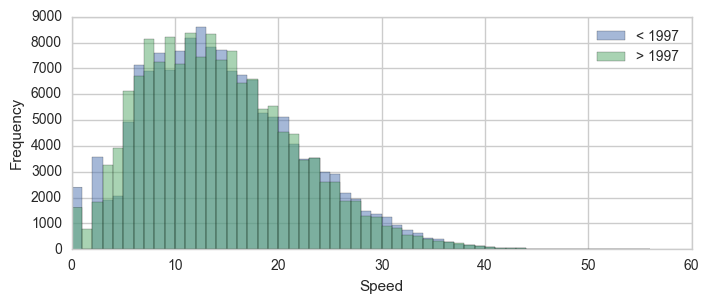

In [19]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

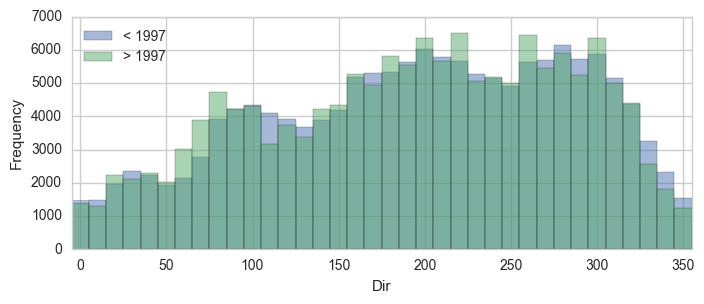

In [20]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3),tight='x')

1979 - 1979


D:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


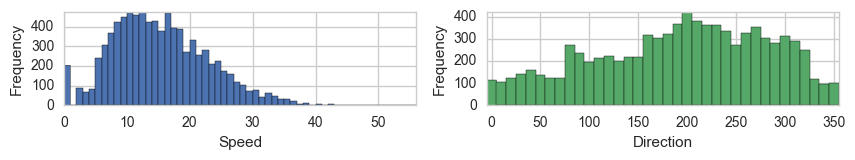

1980 - 1984


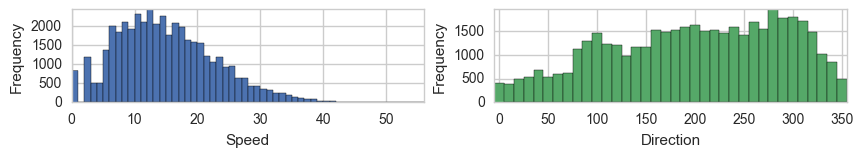

1985 - 1989


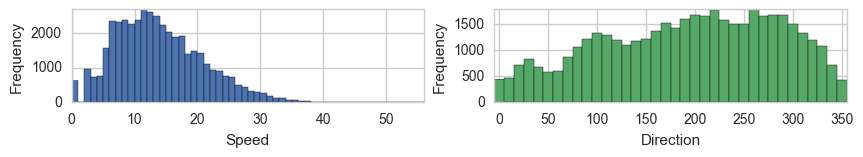

1990 - 1994


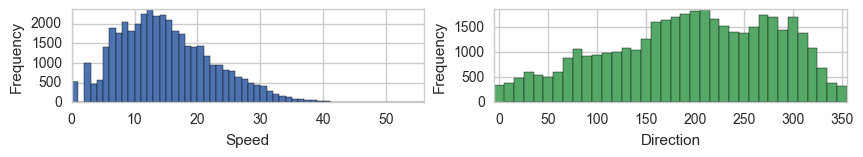

1995 - 1999


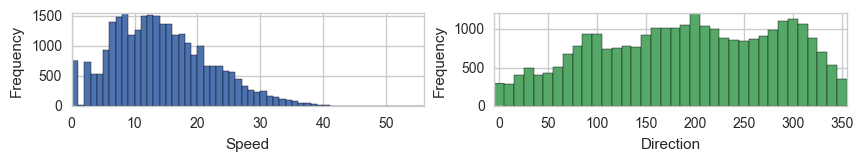

2000 - 2004


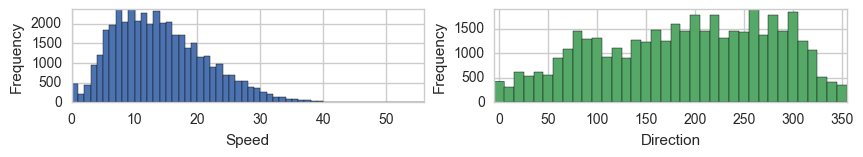

2005 - 2009


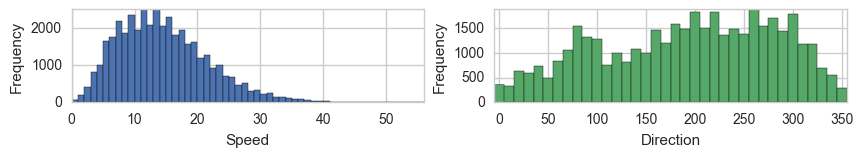

2010 - 2014


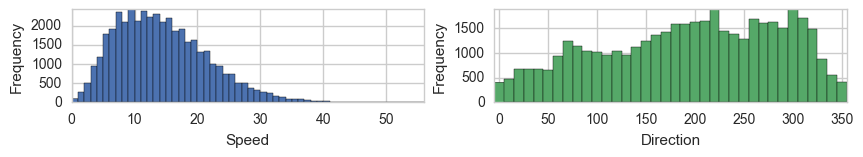

2015 - 2015


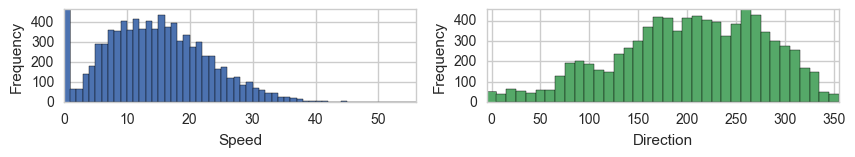

In [21]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df)

### 1.3.4 0 Speed

In [22]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.00669354143313


## 1.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

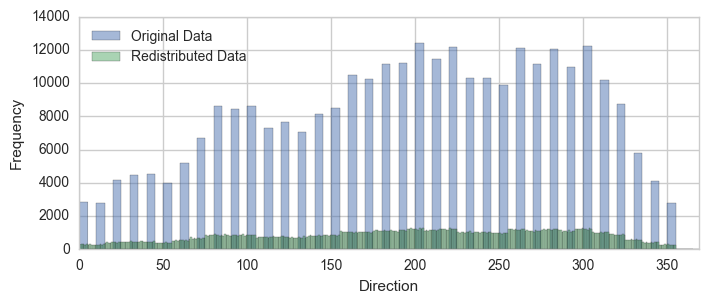

In [23]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


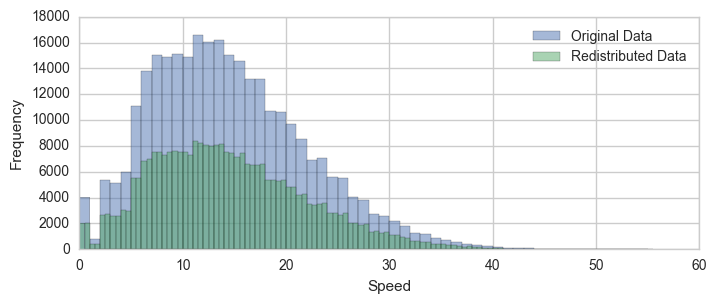

In [24]:
if delete_zero:
    redistribute_method = 'round_down'
else:
    redistribute_method = 'round_up'
df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.5 Generate (x,y) from (speed,dir)

In [25]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [26]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Configs

## 2.1 Data Overview

In [27]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Incre_threshold for artefact detection:', incre_threshold) 
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
print('delete_zero?', delete_zero)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Incre_threshold for artefact detection: 20
Report type used: FM-12
Sampling time used: [0]
delete_zero? False
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  4.283700e+04  42837.000000  42837.000000  42837.000000  42837.000000   
mean   2.012072e+07   1148.978687    193.710738     14.401474      6.518150   
std    1.413668e+04    693.172819     90.975427      7.309973      3.459189   
min    2.010010e+07      0.000000     -4.999754      0.003399      1.000000   
25%    2.011040e+07    500.000000    122.540936      8.807987      4.000000   
50%    2.012070e+07   1100.000000    202.239218     13.525976      7.000000   
75%    2.013100e+07   1800.000000    271.009206     18.982268     10.000000   
max    2.014123e+07   2300.000000    354.978113     55.915033     12.000000   

       dir_windrose       decimal         incre  incre_reverse             x  \
count  42837.000000  42837.000000  42837.000000   42837.000000  42837.000000   
mean     191.330789      0.546484      0.000280      -0.000303     -2.264007   
std      102.782601      0.450140      2.535876       2.535862     10.594938   
min        0.000000      0.000000    -23.000000     -29.000000    -55.822395   
25%      130.000000      0.051839     -1.000000      -1.000000     -9.368680   
50%      200.000000      0.911451      0.000000       0.000000     -2.151192   
75%      270.000000      0.967607      1.000000       1.000000      5.031463   
max      999.000000      0.997842     29.000000      23.000000     37.426572   

                  y  
count  42837.000000  
mean      -2.892208  
std       11.623225  
min      -48.650562  
25%      -11.072469  
50%       -3.087750  
75%        5.531236  
max       37.977516

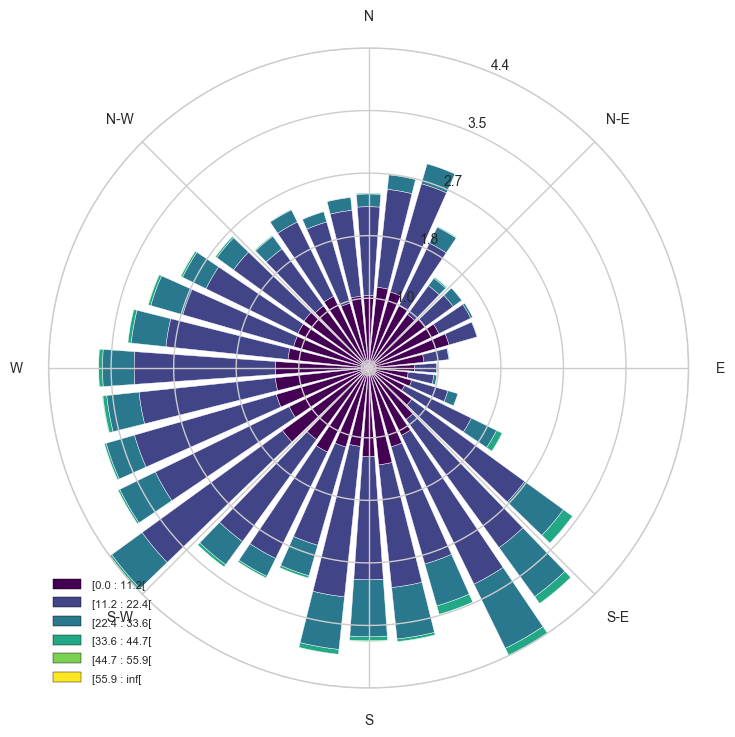

In [28]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [29]:
ax, _params = WindAxes.from_ax().pdf(df.speed, bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF')

fig,ax = plt.subplots()
ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

k_shape, lamb_scale = weibull_params[1], weibull_params[3]
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYsAAAEwCAYAAABG7V09AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzs3XtcVGX+wPEPMDCDXMQQES+F1iooCoJYFmqZZpYudlHb
3VqzTCvbdSvNvBSVhVrm5matRkal5Wb+LFtJU9vK1dwE5WIgiRe8IhcDbwwzwMzvjyOj40DcBs/M
8H334sWcZ5455/s4NN95znPO87iZzWYzQgghxG9wVzsAIYQQjk+ShRBCiHpJshBCCFEvSRZCCCHq
JclCCCFEvSRZCCGEqJckCyGEEPWSZCGEEKJekiyEEELUyyGShdFoZPbs2cTGxjJo0CCSk5PrrJuT
k8O4ceOIiopi7NixZGdnWz2/adMmRowYQb9+/Xj00Uc5efJkS4cvhBAuzyGSxcKFC8nJyWHlypUk
JCSwdOlSNm/ebFNPr9czefJkYmNjWbduHVFRUUyZMoWKigoA9uzZw/Tp05k0aRJffPEFnp6ePPPM
M1e7OUII4XJUTxZ6vZ61a9cyd+5cwsLCGDZsGJMmTWLVqlU2dVNSUvD29mbGjBl0796dOXPm4OPj
w6ZNmwBITk4mPj6esWPHEhoayty5cykuLqasrOxqN0sIIVyK6skiNzeX6upqoqKiLGUxMTFkZWXZ
1M3KyiImJsaqLDo6mvT0dAB27drF8OHDLc916dKFb7/9loCAgBaKXgghWgfVk0VxcTEBAQFoNBpL
WWBgIAaDgdLSUqu6RUVFdOjQwaosMDCQwsJCzp07x5kzZ6iqquLRRx8lLi6OJ598ksLCwqvSDiGE
cGWqJwu9Xo+Xl5dVWc220Wi0Kq+oqKi1rtFopLy8HIDXXnuNMWPGsGzZMoxGI48//ngLRi+EEK2D
pv4qLUur1dokhZptb2/vBtXV6XR4eHgAMHbsWEaPHg3AokWLuOWWW8jIyLA6zVWXqqoqzpw5g1ar
xd1d9TwqhBDNZjKZMBgMtG3b1uoMTmOpniyCg4MpKyvDZDJZPqBLSkrQ6XT4+/vb1C0uLrYqKykp
ISgoiHbt2qHRaOjWrZvluYCAAAICAigoKGhQsjhz5gz5+fnNb5QQQjiY0NBQAgMDm/x61ZNFeHg4
Go2GjIwMoqOjAUhLSyMiIsKmbmRkJElJSVZle/bs4cknn8TDw4OIiAhyc3MZOXIkAL/++iulpaV0
7ty5QbFotVoA2rdvj6+vb3OapTqDwUBBQQEhISGWdjkzaY/jcqW2gOu15/z585SUlDS7LaonC51O
R3x8PAkJCSQmJlJYWEhycjILFiwAlJ6Dn58fWq2WESNGsHjxYhITExk/fjyrV69Gr9dz5513AjBx
4kRmzZpFeHg4v/vd73jjjTfo1asXffv2bVAsNT0bX1/fZmVgR1BeXk5BQQEBAQG0adNG7XCaTdrj
uFypLeB67QHlc7S5p9Yd4sT8rFmziIiIYMKECcybN49p06YxbNgwAOLi4ti4cSOgfIgvW7aMtLQ0
7rvvPvbu3UtSUhI6nQ6AESNGMGvWLF5//XXuv/9+AN555x11GiWEEC5E9Z4FKL2L+fPnM3/+fJvn
cnNzrbb79OnDunXr6tzX2LFjGTt2rN1jFEKI1swhehZCCCEcmyQLIYQQ9ZJkIYQQol6SLIQQQtRL
koUQQoh6SbIQQghRL0kWQggh6uUQ91mI5jMajWRmZlq2Kyoq8PT0VDEiIYQrkWThIjIzMxkwIBvo
fbHkIB995N7gqU6EEOK3SLJwKb2B2Mu296kViBDCxciYhRBCiHpJz6KVuXJsA5Sp369cgVAIIS4n
yaKVsR3byGbXLoiNjf2tlwkhWjlJFq3SlWMbQgjx22TMQgghRL2kZ+HgrhxjkPEFIYQaJFk4OOsx
BjuPL3heAO9Czlf6YDKbcHeTjqYQonaSLJyC/cYYfjX8CrH/gZ4vQOh3oDEydAu4bXEjokMEk6In
8efIPxOgC7DL8YQQrkG+SrYSZrOZDzM+5L4f7oO7X4cbvgGN8dLzmNlbtJdpm6bR6c1OPL3pafSV
ehUjFkI4EulZtAKnzp9i8r8n8+/9/75UWBgB+0fDKV/mvqLHL9iPtTlrST2Zir5Kz1s/vcWWQ1t4
IewFuvt1B2S8RIjWTJKFizt57iR3/OsODpcdBqBrm64cezsBjj16sUYqv++qjIM8d8tz7CnYQ8L3
CWzYv4Hs4mweOPln+PccyLpW7scQohWT01Au7Gz1WUZ/PtqSKP4y4C98MugTOFb35ILRIdF89cBX
/OPOf+Dp7gmeRrjnJeh79CpFLYRwRJIsXJX2PItOLSL3dC4A826bxz9G/gOdh67el7q5ufGXG//C
BwM/gPPXgJsZxrzM1oKtLR21EMJBSbJwSWa4fy5HjEcAmD5wOnMGzWn0Xnq27QkfL4Xya8DdxAsZ
L/B13tf2DlYI4QQkWbii/svhdz8CMKHPBF4f/jpubm5N21fRDbByM1T4UG2u5g//9wcO/nrQjsEK
IZyBJAtXc80BuONZADp5dmLxsMUNShRGo5HU1FTLj9F46bJaCmJg9Zt4uHlw1nCWsZ+PpaKqoqVa
IIRwQJIsXIl7FdzzZ/Aqh2oPHg96HJ2m/jEKuHSn+IABMGBAts005hyJ5okeTwCQfiqdpzc9be/o
hRAOzCGShdFoZPbs2cTGxjJo0CCSk5PrrJuTk8O4ceOIiopi7NixZGdnWz3fv39/wsPDCQsLIyws
jPDwcPT6VnJz2U3/gq47lcffP8Z12usauYOaO8V71/rsg90fZFSPUQAs272Mz37+rMmhCiGci0Mk
i4ULF5KTk8PKlStJSEhg6dKlbN682aaeXq9n8uTJxMbGsm7dOqKiopgyZQoVFcopkcLCQi5cuMDW
rVvZsWMHO3bsYPv27Xh7e1/tJl11ZcYyGPyBsnF8AOz4s92P4e7mzkdjPuLattcC8NTGpygpL7H7
cYQQjkf1ZKHX61m7di1z584lLCyMYcOGMWnSJFatWmVTNyUlBW9vb2bMmEH37t2ZM2cOPj4+bNq0
CYBDhw4RFBRE586dCQwMtPy0BskHkkF3XtnYtARMLXO/5TXe15Acr/T8SspLmL55us14h82YhxDC
6ameLHJzc6muriYqKspSFhMTQ1ZWlk3drKwsYmJirMqio6NJT08H4MCBA4SGhrZovI4ovyyftUfX
Khs598Hxm1r0eEO7DeXhqIcB+CjzI5K+TbpsvKOOMQ8hhFNTPVkUFxcTEBCARnPpm3BgYCAGg4HS
0lKrukVFRXTo0MGqLDAwkMLCQgAOHjyIXq/noYceIi4ujsmTJ5Ofn9/ibVDbC9+9QKWpEkwe8G3i
VTnmouGLaN+mPQALfl4AmutRxjvqHvMQQjgv1ZOFXq+3mZyuZvvKUxkVFRW11q2pd+jQIc6ePcvU
qVP55z//iU6n4+GHH6a8vLwFW6CujFMZfJL1ibKxOx5O97gqxw1sE8hbI94C4Hj5cYj7+KocVwih
DtUnEtRqtTZJoWb7yoHpuurqdMrloStWrKCqqsryukWLFjFkyBC+++477r777gbHZDAYHCbBKIP3
Oqvty2N79ftXMWPG28Mb/Q+TbF5/5ZVgV+7vUhk2x6mt7PJjj7l+DLdeeyvfH/0ebl4Faa/A+ZBa
6zZXTTtc5co2V2qPK7UFXK89BoPBLvtRPVkEBwdTVlaGyWTC3V3p6JSUlKDT6fD397epW1xcbFVW
UlJCUFAQAJ6ennh6elqe8/LyokuXLpbTVA1VUFBAQUFBU5pjd4cPHwbCrbbbtGkDwMnyk3zxyxcA
DPYZzDfn29u8/srTcFfu71IZNseprazm2DUmh07mh6M/YPaqgNtehH8n1VnXHlzttKIrtceV2gKu
157mUj1ZhIe

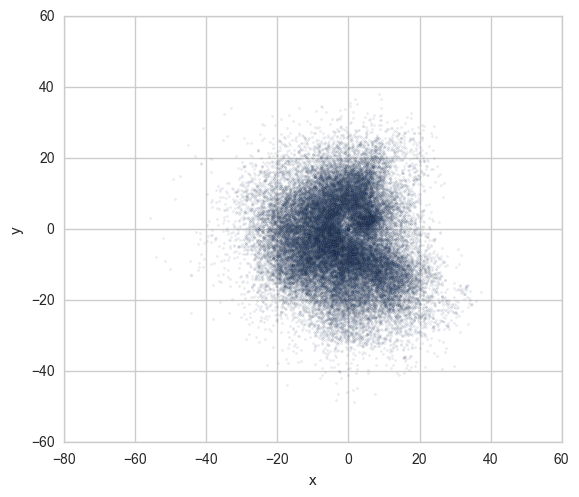

In [30]:
df.plot(kind='scatter', x='x', y='y', alpha=0.10, s=2)
plt.gca().set_aspect('equal')

## 2.2 Overview by Month

In [31]:
viridis = plt.get_cmap('viridis')

month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        if month_incre == 1:
            title = 'Month: %s' % (month)
        else:
            title = 'Month: %s - %s ' % (month, end_month-1)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
        plt_configure(figsize=(3,3), title=title)
        # fig,ax = plt.subplots(figsize=(3,3))
        # sub_df['speed'].hist(bins=arange(0,sub_df.speed.max()))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAScAAAEvCAYAAAAHCQcsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsnXd8W+W9/9/akrUs2/LeIx4ZJIQEwmguo+zSwmWWH21v
uTRllC5oy6Ut6S0FWih0UUqBXFpKKbtQNiWMshJmlu14xXtIsvZe5/eHq4ONncROfOQRvV8vvSDS
Y51zpEef832+z3fIBEEQyJAhQ4Z5hnyuTyBDhgwZpiIjThkyZJiXZMQpQ4YM85KMOGXIkGFekhGn
DBkyzEsy4pQhQ4Z5SUacMmTIMC/JiFOGDBnmJRlxypAhw7wkI06LkEsuuYSGhgYuuuiivY759re/
TUNDA9ddd92sH39kZIQNGzYwODgoPnfCCSdIcqxbbrmFSy65ZNbfN8PckxGnRYpCoWDbtm2MjIxM
ei0UCvHaa68hk8kkOfbbb7/NG2+8Icl7j2fTpk3cf//9kl1HhrklI06LlKamJjQaDS+88MKk1159
9VV0Oh0FBQWSHDuVrilV2mZ/fz9XXXUVt99+OyaTSZJjZJh7MuK0SNHpdKxfv35KcXruuec49dRT
kcsnfv3RaJQ777yT0047jRUrVnDKKadwzz33TBCZSy65hB/+8Ifcc889HH/88axYsYKLLrqI7du3
A/Dkk0/yP//zPwCceOKJE5Zy8XicW2+9lWOPPZZVq1Zx6aWX0tvbK76+detWGhoa+Pvf/77Pa7v5
5pvp7e3l/vvvp76+fuYfToYFQUacFjGnn346H3/88YSlnd/v54033uCMM86YNH7Dhg1s2rSJCy64
gLvvvptTTz2VX/3qV9xwww0Txr344ou88sor/PjHP+b222/H4XDwzW9+E0EQWL9+PZdffjkAd955
J1dccYX4d88++ywdHR38/Oc/54YbbmDnzp185zvfEV9funQpjzzyCOvXr9/ndX3729/m6aef5ogj
jjigzyXDwkA51yeQQTrWr1+PTqfjhRde4Mtf/jIAL7/8Mnl5eaxevXrC2Ndff5133nmHO+64g9NO
Ow2AdevWodVq+c1vfsOXv/xlampqgDELaNOmTWRlZQFw5ZVXAtDS0kJTUxPl5eUA9Pb28rOf/YzN
mzcDUFhYyO9//3sUCgUAPT09/OEPfyAQCKDX69Hr9axYsWK/11VbW3uwH02GBUDGclrEaDQajj/+
+AlLu+eee47TTz990titW7eiVCo59dRTJzx/1llnIQgCW7duFZ+rq6sThWk877///qTnxjurV6xY
IQoTQGlpKQA+n28GV5XhUCEjTouc008/Xdy1c7vdvPPOO1Mu6bxeLxaLZdLOl9VqBSYKiFarnfJY
999/P/F4fK/notPpJvw75fNKJpPTu5gMhxSZZd0i57jjjiMrK4sXX3wRnU5HaWkpjY2Nk8aZzWZc
LheCIEwQKJvNBoDFYtnncWQyGU6nk/vuu4/8/PzZvYgMhyQZy2mRo1arOemkk3jhhRd4/vnnOfPM
M6cct2bNGhKJBM8///yE55966ilkMtkkH9VUnHPOOdx11114PJ5ZOfcMhzYZy+kQ4LTTTuPrX/86
CoWCH/3oR1OOWb9+PWvXruVHP/oRIyMjNDQ0sGXLFu69917OPvtsqqur93ucU045hQ8++IBnn30W
QRDYsWMHsVhs2ufp9/vp7OykrKyMnJycaf9dhsVJxnJapIxfmh1zzDGYTCaWLFlCVVXVhDHjx/3x
j3/kggsu4E9/+hMbNmzgpZde4pprruGmm27a63uPRy6Xs3HjRnbu3ElDQwMvvvjiBCtqf5Hczc3N
XHjhhTOOLs9EiC9OZJnuKxkOloaGBh544AHWrFkDwA9/+EPefvttLr30UjZt2sQrr7wyx2eYYSGS
sZwyzDrXXHMNwWCQTZs2zfWpZFjAZMQpw6yTnZ3NNddcw8DAwFyfSoYFTEacMhw0U/l8zj33XFat
WpXxB2U4YDI+pwwZMsxLMpZThgwZ5iUZccqQIcO8JCNOGTKMIxqN8pOf/IS1a9dy7LHHcscdd+x1
7O7du/niF7/IYYcdxllnncWWLVvSeKaLn4w4ZcgwjhtvvJF33nmHTZs2cdttt/HII4/wyCOPTBrn
9/u59NJLqaur45lnnuGzn/0sV111FU6ncw7OenGSEacMGf6Nx+PhiSee4MYbb2TZsmUcddRRfPWr
X2Xbtm2Txj7xxBPo9Xp+8pOfUFZWxje+8Q0qKyvZuXPnHJz54iSTW5chw7/54IMPMBqNEypsXnbZ
ZVOOfe+99zjhhBMmPPfoo49Ken6HGhlxyrBPBEEgHo8Ti8XERzQaJR6Pk0wmJzQzSD3G5+yl/l8m
k6FSqaZ8zJdYqL6+PkpKSvj73//O3XffTSwW45xzzuHyyy+fdI59fX0sX76cH//4x2zevJnS0lK+
973vcfjhh8/R2S8+MuJ0iCMIAuFwmGAwSCQSmSBAsVhsyuJxnxaf8c8LgkAikZhQ8fLTAvZpFAoF
KpUKtVotCpZGo0Gn06HT6SY1YpCKYDBId3c3jzzyCLfccgt2u50f/ehHZGVl8ZWvfGXS2HvvvZcv
felL3HvvvTzzzDNceumlvPDCC5J1tTnUyIjTIYQgCIRCIYLBIMFgkEAgQCgUEgUjJToKhQKlUklW
VhZqtRqNRoNWq0Wj0aDRaPYpFsFgkJaWFpYsWTJlKV9BEIhGo4RCISKRCJFIhGg0Kj7n9/sniZhO
p0Ov15OVlUVWVpZkgqVQKAgEAtx+++0UFhYCMDAwwEMPPTRJnBQKBY2NjVx11VXAWPLzW2+9xVNP
PcXXvva1WT+3Q5GMOC1S9idEcrkclUqF2WzGYDBgNpvRaDSSL7FkMpkocvsiGo3i8Xjw+/0Eg0Fc
LhcOh0N8/dOClZWVddDnnp+fj0ajEYUJoKqqiuHh4UljrVbrpBpXlZWVDA0NHdQ5ZPiEjDgtIpLJ
JF6vF7fbjdvtJpFIAJ8IUXZ2NmazGbPZjFI5v796tVqN1WoVa5gDJBIJvF4vHo+HQCCA0+kUBUsu
l2M2m8nOzsZkMh3Q9R122GFEIhF6enqoqKgAoLOzk5KSkkljV65cyXvvvTfhua6uLj73uc/N+LgZ
pmZ+z9AM+yUWi+F2u/F4PHi9XgRBQC6Xo9Vqyc7OJicnZ79WykJBoVBgsVgm1DOPxWI4nU5cLhce
jweXywWAwWDAYrGIFuF0qKqqYv369fzgBz/ghhtuwG63c88994itrxwOB0ajEY1Gw4UXXshf/vIX
fve733HWWWfx5JNP0t/fz1lnnTX7F36Ikkn8XWCkHNgp6ygYDAKgVCoxGo3k5+djMBjm7PxSPqfG
xsYpfU7pOL7NZsPr9YolglNCnZ2dvd/ln9/v58Ybb+Tll19Gp9Nx8cUXi01CGxoauOWWW/jCF74A
wEcffcRPf/pTOjs7qamp4frrr59WrfUM0yMjTguESCSCw+FgdHRU/NGp1Wqys7MpKChArVbP8RmO
MdfiNJ54PI7NZsPlchGJRBAEAaVSicViwWq1TmpVlWF+kVnWzWMEQcDr9YqWAIw1yiwuLsZqtc57
v9Fco1QqKS4upri4mGQyid1uZ3R0FIfDgd1ux2AwYLVayc7OTlu4Qobpk5nd85B4PC7+gKLRKHK5
nNzcXIqLi+eNhbTQkMvlFBQUUFBQQDweZ2hoiNHRUfbs2YNSqcRqtZKXl5f5fOcRmWXdPEEQBNFf
kmpuqdVqKSoqmrIT73xlPi3rpoPX62VgYED03ZnNZvLz8zEajQvmM1+sZCynOSaZTOJ0OrHZbIRC
IWQyGWazmbKyssxdPA2YTCZMJhPxeJz+/n5x10+tVpOfn09eXt6EaPcM6SNjOc0RgiAwOjrKwMAA
8XgcpVJJfn4

## 2.3 Create input data, i.e. speed_set

In [32]:
SPEED_SET = array(list(zip(df.x, df.y)))
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
KDE_GRIDSEARCH = True
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [33]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11
 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28]


In [34]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [35]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [36]:
# %%time
# from sklearn.grid_search import GridSearchCV

# if KDE_GRIDSEARCH == True:
#     # The bandwidth value sometimes would be too radical
#     if knot_unit:
#         bandwidth_range = arange(0.7,2,0.2)
#     else:
#         bandwidth_range = arange(0.4,1,0.1)
    
#     # Grid search is unable to deal with too many data (a long time is needed)
#     if len(sample) > 50000:    
#         df_resample=df.sample(n=50000, replace=True)
#         bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
#     else:
#         bandwidth_search_sample = sample

#     grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
#                         {'bandwidth': bandwidth_range},
#                         n_jobs=-1, cv=4) 
    
#     grid.fit(bandwidth_search_sample)
#     bandwidth = grid.best_params_['bandwidth']

In [37]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

bandwidth = 1.9
kde = neighbors.KernelDensity(bandwidth=bandwidth,kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 1.9 3249
[  4.68154559e-06   5.84700839e-06   7.22199537e-06   8.42571263e-06
   9.30257198e-06]


In [38]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x', ylabel='y',ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(4,3))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAb4AAAG+CAYAAADsjWHpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsvXuUFOWd///ue/f0ZQZmGG4x36gRIcuGBhw9yaJfSTBI
TlbdJWh0N7K7Es3m6yVuQgzKhgiGnwZjNgZzzLJKEjSbKGE1ihrjXsz3G6MGFCESNOAdmGFGmO6e
7upbVf/+aJ6ap6qeqq7qruqu6X5e53B0uqurn+7qqnd97p5KpVIBh8PhcDgdgrfVC+BwOBwOp5lw
4eNwOBxOR8GFj8PhcDgdBRc+DofD4XQUXPg4HA6H01Fw4eNwOBxOR8GFj8PhcDgdBRc+DofD4XQU
XPg4HA6H01Fw4eNwOBxOR8GFj8PhcDgdBRc+DofD4XQUXPg4HA6H01Fw4eNwOBxOR8GFj8PhcDgd
BRc+DofD4XQUXPg4HA6H01Fw4eNwOBxOR8GFj8PhcDgdBRc+DofD4XQUXPg4HA6H01Fw4eNwOBxO
R8GFj8PhcDgdBRc+DofD4XQUXPg4HA6H01Fw4eNwOBxOR8GFj8PhcDgdBRc+DofD4XQUXPg4HA6H
01Fw4eNwOBxOR8GFj8PhcDgdBRc+DofD4XQUXPg4HA6H01Fw4eNwOBxOR8GFj8PhcDgdBRc+DofD
4XQU/lYvgMNxmkqlgkKhAK/XC7/fD6+X3+9xOJ0MFz5OWyOKIsrlMsrlMiRJAgD5v4FAAJFIhAsh
h9NhcOHjtCWiKCKVSkGSJEQiEXg8Hng8HgBAoVCAJEkoFosQRRFer1e2BrlFyOG0P1z4OG2HJEko
FAooFAoAgGAwCFEU4fF4NKLm8XhQqVRkyxCAQggDgYAsmBwOpz3gwsdpK2gBI+RyOVQqFc22lUoF
lUpFFjbyX1oI8/k8F0IOp83wVFhXBA5nglGpVFAqlSBJEjwej+zqNIPP55P/eb1eXWEjpwoXQg5n
YsOFjzPhkSQJpVJJtt5EUcTY2BhEUZS3iUQisiVXKpUM98eFkMNpb7jwcSYs6ticx+NBsVhENptV
uDYjkQgCgYCczSkIgpzU4vP5IIqi/Jwaj8ejEEI6SUa9FgIRwkAgAL/fz4WQw3EZPMbHmZCoXZuV
SgXZbFZOaKHRy9L0eDwIhULy/kRRlIWUCFmlUpHLIchrWEJIi5v6NURgSdYoF0IOp7Vw4eNMOGhx
Yrk2PR4PotEoxsbGTO/T4/HIwhQKhSBJkiyEoig2LISlUkl2sZJ1+/1+udSCw+E0Dy58nAkDER1S
mgBUa/Ky2ay8TSAQQDQabVhMaHclgLqFkFib9Hry+bzsai2Xy/J23CLkcJoDFz7OhECdwCJJEnK5
HIrForxNV1cXQqGQ7Pok6IWxrYS37RZCAvksoiiiWCzK78OFkMNxDi58HNejdm2Wy2WMjY3JCSle
rxexWAx+v/7P2W7xaEQICbTw0u5RLoQcjrNw4eO4FpZrUxAECIIgbxMMBi27Np0QDloISWG8nhAS
SEKOnmuUJYTEgiTvReKKHA7HPFz4OK6E5drMZrOKGrxoNCpnZboJIlp6Qkh3ltHLAKWTZeh9AlwI
OZxG4cLHcR1q12CpVMLY2JhsLfl8PsRiMfh8Pt19qC/+rSxXVQshqSMkokVbhJIkyaIPcCHkcJyA
Cx/HNeTzeQiCgEqlgmg0ikqlglwuh3w+L28TCoXQ1dVl6WLuth4NtHiFw2FUKhVNjJDAhZDDsR8u
fBxXIIoi8vm8LHLhcJhZmxcMBlu5TEegMz8BOC6EpA0b6SzDxzBxOg0ufJyWQiew0KTTadlS8/v9
iMViHXOBdloIRVFELpcDULWgQ6GQ3FmGW4ScToALH6dlqBNYaIjoRSIRhMPhjr4YOyGE9L7JvgqF
guK9uBBy2hUufJyWwKrNo2N5Ho8HsVhMrpOrB7qQvVZj6YlEo0LIspz1XKMAuBBy2g4ufJymQlyb
9DSEfD4vu94IiUTCMGvT6nu2M/UIIaFQKECSJM0IJlrcWDFCLoSciQwXPk7TMFObR3AyntfuF2or
QlipVBRt3/RmEXIh5LQTXPg4TYEeAEtq87LZrKLtWCgUkruysOJ+nPpQC6EoivL3rO5rqhbGRoQw
EAgYDvLlcFoFFz6Oo7Dm5qnbjpHaPNry4DgHLUQko5O2BmlXKBdCTjvChY/jGOoEFkmSMDY2pujK
QiYqOIHamuFUUX8n9CxC8jwXQk47w4WPYzvq5tIejwfFYhHZbNaw7ZhTF0AuftZohhCWy2WkUikA
1WYFoVAIwWBQM8SXw3ECLnwcW2G5NnO5HAqFgrxNOByuOXmci5V7cEIIAcivkyQJxWJRYxEGg8GO
aVrAaS5c+Di2oXZtiqLYMW3HOolGhZA1U7CWa9Tv98uuUQ6nUbjwcRpGXZvn8XhQKBSQzWblbdzY
doxblfa4lxsRQqA6jYNYg3qu0UKhgHw+r+hEw4WQUy9c+Dh1w5olR4ar0hmaZtuO6U0nrxceK2oN
aiHUm05PIL8huuyC1APq9RolnX64EHLqgQsfp24EQZATFLq7u1EulzE2NqaozYvFYvIFsFWwshg5
zYOeTg+MNzJQNy5Q30iphZAWNT0hJNsR4eVCyGHBhY9jGZLAQrusiCuKEAwG0dXV5YoLjyRJyGQy
AKoxJu7ibC1EmIjwkZmEaouwHiEk+6G9EFwIOWq48HEsoU5gIdCiRxJYrFpWdlti5AJKLoIAFPEm
ACgWi8yMQ07zIK5R2iJkuUatCiF5DRdCjhoufBxTqOfmkYkKNKzavEberxHUzZiB6kWPJXwEo9R7
TvOgXaOVSkWTLGOnENIzH7u6uvgx7xC48HFqolebR1t5gUAAsVjMFReOUqmEsbEx+W8y4oiIXqFQ
0Ig2oMw4NEq04DQP8r03IoSs5tnk/8lvwev1QhRFhUUYCAT4MW9TuPBxDGHV5mWzWY1wuGFYbKVS
QT6fV/QBBSDf/RPhpi2BaDTKTL23Yk1wrFOvRd+IEJoZyktbhCRrlAth+8GFj8PEbNsxdU1WIzRS
zsDqA0r6gxpdrMym3rOEkFgSfBRP69ATQvLbrTWUlz6+6v2Sx7kQth9c+Dga1HPz9NqOBYNBpNNp
AK0tBieuTXUfUHrskR7qJB1W6r2eENIp+bWsCTfhtqxWO78rIoSkO1CtobwE8hvXO4a0EJIbIFoI
A4EAsyMNx51w4eMoMNN2LBaLIRAI2Grt1QPLtUlGHNl1AdJLtKATfQC2NUHiSzxRpnVYGcqrdwzV
Qqj2TKjdqVwI3Q8XPg4AbQILAE3bsUAggGg0Kse37D6preyP5do02we03nWz3GpmL6L0BdRtFlcn
oRbCXC6niP06IYTkBogLoXvgwsfRuDYlSUIul1Ok+pO5eXonrt0Xc6P96bk21WUUtHvKiQuOFWuC
1aOSWI/cImw9Xq8XkUjEEYuQdomrO8vw494auPB1MOqaJlKb58a2Y0BzXJuNwBJCvWbN5HlBEFpa
OtGq781tVi8tWk66RunJE8QtyoWw+bT+asZpCazaPEEQFKISDAYRjUZ1T8ZmnqSNuDZbhd7UgkKh
oLjw89IJ99KIEBoN5SX/T/ZFbjZ9Ph+i0SgXQofhwteBqBNYJElCNptVNA2ORqMIhUKm9+nkNAWz
rk23Q4SQnkYQDAY7vnRiIn0eK1a9len0RFCB6u+dzCIk2wYCgbY89q2CC18HQU4oSZLkXppuFRWS
Qelm12ajeDweBAKBti6dcDvkO24k4cmO6fT0OlgWIRdCe+HC1yGQCQWFQkGeXSYIgqLtmFVRaaTg
vBaVSgWZTKYh1+ZEuyg0WjrBhbD1NCKEwLjQ1XKNciFsDC58HQCdwAJUT550Oq2ozXNbvCyfz9tm
hRqJslMZn41

In [39]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [40]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [41]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight   mean_x   mean_y  sig_x  sig_y    corr
1  0.345  -10.104   -3.442  9.025  9.816  -0.147
2  0.330   -0.090    5.951  7.681  8.870   0.147
3  0.324    3.873  -11.308  9.557  9.113  -0.239

GMM Plot Result
0.345458306004 [[-10.10374832  -3.44193101]] [  8.59473586  10.19478618] -149.859311058
0.330163200689 [[-0.09043482  5.95085594]] [ 7.402212    9.10396568] 157.230127291
0.324378493307 [[  3.87286633 -11.30752463]] [  8.12284499  10.4116379 ] -129.375394721


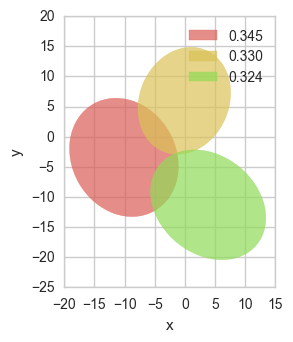

In [42]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax)

In [43]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAb4AAAG+CAYAAADsjWHpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsvXu0FOWZ//vte/fu3hfYsLnFsyYaEQwzNODWE4MuOUGR
WRnhjINGZ43MjARdc0QnkxCD8gsRHEajMZNEc8ywDElQJ0HCaBR1jHMxvxWjBhU3gYMZr1Fgw97A
vnVX36rq/NH7qf3W21XdVd1V3bW7389aLtld1dVvV3W933qe97n4VFVVIRAIBAJBi+Bv9AAEAoFA
IKgnQvgEAoFA0FII4RMIBAJBSyGETyAQCAQthRA+gUAgELQUQvgEAoFA0FII4RMIBAJBSyGETyAQ
CAQthRA+gUAgELQUQvgEAoFA0FII4RMIBAJBSyGETyAQCAQthRA+gUAgELQUQvgEAoFA0FII4RMI
BAJBSyGETyAQCAQthRA+gUAgELQUQvgEAoFA0FII4RMIBAJBSyGETyAQCAQthRA+gUAgELQUQvgE
AoFA0FII4RMIBAJBSyGETyAQCAQthRA+gUAgELQUQvgEAoFA0FII4RMIBAJBSyGETyAQCAQthRA+
gUAgELQUQvgEAoFA0FII4RMIBAJBSyGETyAQCAQthRA+gUAgELQUQvgEAoFA0FII4RMIBAJBSyGE
TyAQCAQtRbDRAxAI3EZVVWSzWfj9fgSDQfj94nlPIGhlhPAJmhpZllEoFFAoFKAoCgBo/w+FQojF
YkIIBYIWQwifoCmRZRnDw8NQFAWxWAw+nw8+nw8AkM1moSgKcrkcZFmG3+/XrEFhEQoEzY8QPkHT
oSgKstksstksACAcDkOWZfh8vhJR8/l8UFVVswwB6IQwFAppgikQCJoDIXyCpoIVMCKdTkNV1ZJ9
VVWFqqqasNH/WSHMZDJCCAWCJsOnGs0IAsEkQ1VV5PN5KIoCn8+nuTqtEAgEtP/8fr+psNGtIoRQ
IJjcCOETTHoURUE+n9esN1mWMTY2BlmWtX1isZhmyeXz+bLHE0IoEDQ3QvgEkxZ+bc7n8yGXyyGV
Sulcm7FYDKFQSIvmlCRJC2oJBAKQZVnbxuPz+XRCyAbJ8GMhSAhDoRCCwaAQQoHAY4g1PsGkhHdt
qqqKVCqlBbSwmEVp+nw+RCIR7XiyLGtCSkKmqqqWDkHvMRJCVtz495DAUtSoEEKBoLEI4RNMOlhx
MnJt+nw+xONxjI2NWT6mz+fThCkSiUBRFE0IZVmuWQjz+bzmYqVxB4NBLdVCIBDUDyF8gkkDiQ6l
JgDFnLxUKqXtEwqFEI/HaxYT1l0JoGohJGuTHU8mk9FcrYVCQdtPWIQCQX0QwieYFPABLIqiIJ1O
I5fLafu0tbUhEolork/CbBnbzvK200JI0HeRZRm5XE77HCGEAoF7COETeB7etVkoFDA2NqYFpPj9
fiQSCQSD5j9np8WjFiEkWOFl3aNCCAUCdxHCJ/AsRq5NSZIgSZK2Tzgctu3adEM4WCGkxHgzISQo
IMfMNWokhGRB0mfRuqJAILCOED6BJzFybaZSKV0OXjwe16IyvQSJlpkQspVlzCJA2WAZ9piAEEKB
oFaE8Ak8B+8azOfzGBsb06ylQCCARCKBQCBgegx+8m9kuiovhJRHSKLFWoSKomiiDwghFAjcQAif
wDNkMhlIkgRVVRGPx6GqKtLpNDKZjLZPJBJBW1ubrcncazUaWPGKRqNQVbVkjZAQQigQOI8QPoEn
kGUZmUxGE7loNGqYmxcOhxs5TFdgIz8BuC6EVIaNKsuINkyCVkMIn6ChsAEsLCMjI5qlFgwGkUgk
WmaCdlsIZVlGOp0GULSgI5GIVllGWISCVkAIn6Bh8AEsLCR6sVgM0Wi0pSdjN4SQPTYdK5vN6j5L
CKGgWRHCJ2gIRrl57Fqez+dDIpHQ8uSqgU1kr1RYejJRqxAaWc5mrlEAQggFTYcQPkFdIdcm2w0h
k8lorjeio6OjbNSm3c9sZqoRQiKbzUJRlJIWTKy4Ga0RCiEUTGaE8AnqhpXcPMLN9bxmn6jtCKGq
qrqyb2a9CIUQCpoJIXyCusA2gKXcvFQqpSs7FolEtKosRut+gurghVCWZe0883VNeWGsRQhDoVDZ
Rr4CQaMQwidwFaO+eXzZMcrNYy0PgXuwQkQRnaw1yLpChRAKmhEhfALX4ANYFEXB2NiYrioLdVRw
A96aERThzwnbi5C2CyEUNDNC+ASOwxeX9vl8yOVySKVSZcuOuTUBCvGzRz2EsFAoYHh4GECxWEEk
EkE4HC5p4isQuIEQPoGjGLk20+k0stmstk80Gq3YeVyIlXdwQwgBaO9TFAW5XK7EIgyHwy1TtEBQ
X4TwCRyDd23KstwyZcdaiVqF0KinYCXXaDAY1FyjAkGtCOET1Ayfm+fz+ZDNZpFKpbR9vFh2TFiV
zriXaxFCoNiNg6xBM9doNptFJpPRVaIRQiioFiF8gqox6iVHzVXZCE2rZcfMupNXi1gragy8EJp1
pyfoN8SmXVA+oFmtUar0I4RQUA1C+ARVI0mSFqDQ2dmJQqGAsbExXW5eIpHQJsBGYRTFKKgfbHd6
YKKQAV+4gH+Q4oWQFTUzIaT9SHiFEAqMEMInsA0FsLAuK3JFEeFwGG1tbZ6YeBRFwejoKIDiGpNw
cTYWEiYSPupJyFuE1QghHYf1QgghFPAI4RPYgg9gIVjRowAWu5aV05YYTaA0CQLQrTcBQC6XM4w4
FNQPco2yFqGRa9SuENJ7hBAKeITwCSzB982jjgosRrl5tXxeLfDFmIHipGckfES50HtB/WBdo6qq
lgTLOCmEbM/HtrY2cc1bBCF8goqY5eaxVl4oFEIikfDExJHP5zE2Nqb9TS2OSPSy2WyJaAP6iMNy
gRaC+kHnvRYhNCqeTf+m34Lf74csyzqLMBQKiWvepAjhE5TFKDcvlUqVCIcXmsWqqopMJqOrAwpA
e/on4WYtgXg8bhh6b8eaENinWou+FiG00pSXtQgpalQIYfMhhE9giNWyY3xOVi3Uks5gVAeU6oOW
m6ysht4bCSFZEqIVT+MwE0L67VZqysteX/649LoQwuZDCJ+gBL5vnlnZsXA4jJGREQCNTQYn1yZf
B5Rte2QGH6RjFHpvJoRsSH4la8JLeC2q1clzRUJI1YEqNeUl6Ddudg1ZIaQHIFYIQ6GQYUUagTcR
wifQYaXsWCKRQCgUctTaqwYj1ya1OHJqAjILtGADfQBja4LWl0SgTOOw05TX7BryQsh7Jnh3qhBC
7yOETwCgNIAFQEnZsVAohHg8rq1vOX1T2zmekWvTah3Qasdt5FazOomyE6jXLK5WghfCdDqtW/t1
QwjpAUgIoXcQwicocW0qioJ0Oq0L9ae+eWY3rtOTebnjmbk2+TQK1j3lxoRjx5owqlFJ1qOwCBuP
3+9HLBZzxSJkXeJ8ZRlx3RuDEL4Whs9potw8L5YdA+rj2qwFIyE0K9ZM2yVJamjqRKPOm9esXla0
3HSNsp0nyC0qhLD+NH42EzQEo9w8SZJ0ohIOhxGPx01vxnrepLW4NhuFWdeCbDarm/hF6oR3qUUI
yzXlpX/TsehhMxAIIB6PCyF0GSF8LQgfwKIoClKplK5ocDweRyQSsXxMN7spWHVteh0SQrYbQTgc
bvnUicn0fexY9Xa605OgAsXfO/UipH1DoVBTXvtGIYSvhaAbSlEUrZamV0WFIii97NqsFZ/Ph1Ao
1NSpE16HznEtAU9OdKdnx2FkEQohdBYhfC0CdSjIZrNa7zJJknRlx+yKSi0J55VQVRWjo6M1uTYn
26RQa+qEEMLGU4sQAhNCV8k1KoSwNoTwtQBsAAtQvHlGRkZ0uXleWy/LZDKOWaHlRNmtiM9acSp1
QkSMNhY7Qkj

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYoAAAEpCAYAAACN9mVQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsvX90FNX9///c3ZBssgFCNtkkiwgkMT/4YTbEYLFBiw0q
vlugraC0VeoXThAbsPWQDwSiqaAIBe3bUwQsIm1BPSIiKljrW4t4BKsSSDYlCZFAgRA2yUISYrKb
wOx8/1hns7M/Z3ZnfyWvxzl7IHPv3Htndnee+3q97n1dGcuyLAiCIAjCDfJQD4AgCIIIb0goCIIg
CI+QUBAEQRAeIaEgCIIgPEJCQRAEQXiEhIIgCILwCAkFQRAE4RESCoIgCMIjUaEeQCi5ceMGurq6
EBMTA7mcNJMgwg2LxYK+vj6MHDkSUVHiH1f9/f24ceOG4PpRUVGIjo4W3c9gZ0gLRVdXF/773/+G
ehgEQXhh3LhxUKvVos7p7+9H7X+qAFb4g18ul2PixIkkFg4MaaGIiYkBAHz5bj26r5hCNg6LhYHZ
bIZSqYRcrgjZODwRCWMEImOckTBGIDzGOVwdi2k/y7V9V8Vw48YNgI3GCPX7iBpm9F7/ehKuXZmN
GzdukFA4MKSFgnM3dV8xodPwXcjGwVgY9Pb2Ii7uBhRh+uCIhDECkTHOSBgjEF7j9Mc1HDXMiGHR
rRKOZuhBjnmCIAjCIyQUBEEQhEdIKAiCIAiPkFAQBEEQHiGhIAiCIDxCQkEQBEF4hISCIAiC8AgJ
BUEQhA/09/dj9erVKCwsxPTp07Fr1y63devq6jB//nzodDrMmzcPp06d4pUfPHgQM2fOhE6nQ2lp
KTo6Oly2s2jRIhw4cIB37OzZs1i0aBEKCgpQXFyMV155hVe+dOlS5OTkIDc31/bvkSNHRF0rCQVB
EIQPbNy4EXV1ddi9ezcqKyuxZcsWfPzxx071TCYTSkpKUFhYiP3790On02HJkiUwm80AAL1ej4qK
Cixbtgx79+5FV1cXysvLeW2wLIt169bh2LFjvONmsxklJSVITU3FO++8g6effhp/+9vf8MYbb9jq
nD17Fi+88AK++OILHD16FF988QXuuOMOUddKQkEQBCESk8mEffv2oaKiAjk5OSguLsbixYuxZ88e
p7qHDh1CbGwsysrKkJ6ejjVr1kClUuGjjz4CALz++uuYNWsWZs+ejaysLGzatAlHjhzBpUuXAACt
ra1YuHAhDh8+jBEjRvDa/uabb3Dt2jU888wzGDduHO6880785je/wcGDBwFYrZ7m5mZMmjQJarXa
9ho2bJio6yWhIAiCEElDQwMYhoFOp7MdKygogF6vd6qr1+tRUFDAOzZlyhScPHkSAFBdXY3CwkJb
WWpqKtLS0lBTUwPA6rbSarXYv38/VCoVr50JEybg5Zdfdsqs293dDcBqTchkMowZM8aPqx3iuZ4I
giB8ob29HQkJCbwHtFqtRl9fHzo6OjBq1Cjb8ba2NmRlZfHOV6vVOHPmjK0tjUbDK09KSoLBYAAA
zJgxAzNmzHA5Ds5C4Ojr68PevXvx4x//GIBVKOLj41FWVoavvvoKaWlpWLZsGe68805R10sWBUEQ
hEhMJpNThlnu7/7+ft5xs9nssi5Xz1u5UFiWxcqVK9Hb24uSkhIAVqHo6+vD9OnTsXPnTtx1111Y
unSpUzDdG2RREARBiCQmJsbpQc79HRsbK6iuUqkUVC4EhmHw//7f/8ORI0fw17/+1WZllJaWYuHC
hRg+fDgAIDs7G//5z3/w1ltvYe3atYLbJ4uCIAhCJCkpKejs7ITFYrEdMxqNUCqVTgHnlJQUtLe3
844ZjUYkJycDADQaDYxGo1O5ozvKHTdu3MATTzyBw4cPY8eOHcjLy+OVcyLBkZGRgba2NkFtc5BQ
EARBiCQ3NxdRUVGorq62HTt+/DgmTZrkVDcvL88WuOY4ceIE8vPzAQA6nQ5VVVW2ssuXL8NgMDg9
8N3x1FNP4csvv8TOnTtx22238crKy8uxevVq3rGGhgaMHz9eUNscJBQEQRAiUSqVmDNnDiorK1Fb
W4tPPvkEu3btwsKFCwFYLYK+vj4AwL333ovu7m6sX78eTU1NePbZZ2EymXDfffcBABYsWID33nsP
+/btQ0NDA1auXIkZM2Zg9OjRXsdx9OhRvPvuu1i1ahXGjBkDo9EIo9GIq1evAgDuvvtufPDBBzhw
4AAuXLiALVu24MSJE3j44YdFXS/FKAiCIHygvLwczzzzjC0G8MQTT6C4uBgAUFRUhA0bNmDu3LmI
j4/H9u3bUVlZib179yI7Oxs7duywxSB0Oh3Wrl2Ll156CV1dXSgqKsK6detc9imTyXh/f/zxx5DJ
ZHj66ad5x7VaLT799FPMnDkTlZWV2LZtGwwGAzIzM/Hqq69Cq9WKulYZy7KsqDMGEb29vaivr8fH
r54Ik61Q40K+5aQ7ImGMQGSMMxLGCITHOBNS43HP4inIzc1FXFycqHO573di6muCtkK93p+Cq4b/
z6e+BjvkeiIIgiA8QkJBEARBeISEgiAIgvAIBbMJQgCNV02C6mUlxnqvRASVjr6LkFkueK3HXhe3
EnooERFC0draiueeew5fffUVlEolZs2ahSeffBLR0dFobm7GU089herqaowePRrl5eX44Q9/GOoh
ExGOK2HImOw9sVpj7UXb/0k0woNL7FT0s7d4rRfNjoK4uUBDh4gQiuXLlyMhIQFvvPEGOjs7sXr1
aigUCpSVleHxxx9Hbm4u3nnnHXzyyScoLS3FP/7xD6SmpoZ62ESE4SgOQoTBEe6cptqLaLxqIrEg
BgVhLxRnz56FXq/H0aNHkZiYCMAqHH/84x8xffp0NDc34+2330ZMTAxKSkrw5ZdfYt++fSgtLQ3x
yIlwRwphcEfG5DEkFsSgIeyFIjk5Ga+++qpNJDi6u7tRU1ODiRMnIiYmxna8oKCAt6yeGHo0m2SQ
9/dD5qWelMLgrn0SC2IwEPZCMXz4cF7MgWVZ7NmzB9OmTXOZx12tVqO11fviGiIyEBpE5mABpGWo
rYvEFKFfzEZiQQwGwl4oHPnjH/+I+vp67Nu3D7t27ZIkjzsRHvgaQLaHYayricMJEgsi0okoodi0
aRN2796N//3f/0VmZiZiYmLQ1dXFqyM2jzsAWCwMGAsj5VBF9m/h/RuOSD3GM53OYj5+gvOcE4YR
976E670cN0GLc3UtOH3VhPQR1q9duI3RkXC4l5YQfi+JASJGKNatW4e33noLmzZtsiXeSklJsW0n
yGGf510oZrM5LH6Fms3mUA/BK76OsdnkHDFIy1Dz/pbyPQjHe5kyLgGXm67AbL4BIDzH6IpQjjPW
HDGPqEFNRLwLW7ZswVtvvYU//elPmDlzpu14Xl4eduzYgf7+fpsLqqqqyiknuzeUSiXi4m5IOmYx
WCwWmM1mKJVKyOXhuVhe7BgdLYaMycGZoR7u91Ku6ERLHwttDBO2Y+QIh3sp1jtABIawF4qmpiZs
27YNS5YsQX5+Pm8nqKlTpyItLQ2rVq3C448/jn/961+ora3Fhg0bRPUhlyvCIounXC4Pi3F4wtsY
uTiDDIGfVeQJuVweFsFsRzInj8GZ7xflRcL7DYR2nPIIuD9DgbAXik8//RQWiwXbtm3Dtm3bAFhn
PslkMtTX1+Pll1/GmjVr8Itf/AI333wzXn75ZVpsFwLsA9GhFIhIodkkQxZlsiYihLAXipKSEpSU
lLgtv/nmm7F79+4gjoiwhwRCPOMnaNFkl+qDIMKdsBcKIjwhgSCIoQMJBSGKM50DK55JIHwnLUON
M//tRDatqyAiABIKQjDNJhnkisgRiNrujoC0O3n4qIC0SxDhCgkF4ZXGqyZeaoxwwlEMWJYFY7FA
0XMdmVlpkvf

## Goodness-of-fit Statistics

In [44]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.970  0.017      0.021  3.260073e-09      0.044       0.190

# 5. GMM by Optimization

In [45]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [46]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -19.986767138923863
     jac: array([  1.98504877e+00,  -2.38418579e-07,   0.00000000e+00,
         0.00000000e+00,  -2.38418579e-07,   0.00000000e+00,
         1.98504972e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.98504710e+00,   0.00000000e+00,   0.00000000e+00,
        -2.38418579e-07,   2.38418579e-07,   2.38418579e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1736
     nit: 86
    njev: 86
  status: 0
 success: True
       x: array([  0.68082987,  -6.21264981,  -4.39551902,   9.8844978 ,
        10.27249988,  -0.20937179,   0.11777223,  10.27018133,
       -12.95347907,   7.03877411,   6.37681505,  -0.32473756,
         0.2013979 ,   2.05430129,   8.9938706 ,   6.68615072,
         6.81206839,  -0.10734099])

## 5.1 GMM Result

In [47]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.681  -6.213   -4.396  9.884  10.272  -0.209
2  0.201   2.054    8.994  6.686   6.812  -0.107
3  0.118  10.270  -12.953  7.039   6.377  -0.325

GMM Plot Result
0.680829868029 [[-6.21264981 -4.39551902]] [  8.94414997  11.10088879] -140.21129816
0.201397903834 [[ 2.05430129  8.9938706 ]] [ 6.37119487  7.10751455] -139.930456776
0.117772228137 [[ 10.27018133 -12.95347907]] [ 5.46506139  7.76796081] -126.528756614


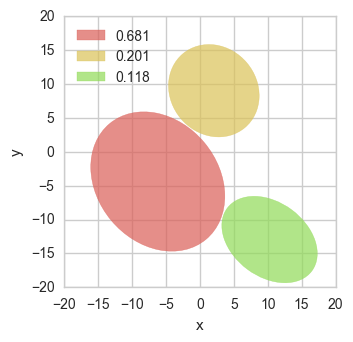

In [48]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm,ax=ax)
# fig_gmm.savefig('foo.pdf')

## 5.2 Goodness-of-fit statistics

In [49]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.015      0.057  2.088610e-09      0.036       0.152

In [50]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y')
fig_gmm = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAb4AAAG+CAYAAADsjWHpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsvXuUG+V9//8e3bXS3tj1GhvS3I2d0HiNs/AjNUl8YgJu
fwVOqUkgbd2euJBfD4bS4hKDG3+51IXa5FIIh4QvuP0aOKlxHAiXUH70tOSXkIYYMCZ2TWJIwHi9
9i7e1V0aaWZ+f2if2WcePTOakWakWel5ncPBK41Gj6SZec/nLmmapkEgEAgEgi4h0O4FCAQCgUDQ
SoTwCQQCgaCrEMInEAgEgq5CCJ9AIBAIugohfAKBQCDoKoTwCQQCgaCrEMInEAgEgq5CCJ9AIBAI
ugohfAKBQCDoKoTwCQQCgaCrEMInEAgEgq5CCJ9AIBAIugohfAKBQCDoKoTwCQQCgaCrEMInEAgE
gq5CCJ9AIBAIugohfAKBQCDoKoTwCQQCgaCrEMInEAgEgq5CCJ9AIBAIugohfAKBQCDoKoTwCQQC
gaCrEMInEAgEgq5CCJ9AIBAIugohfAKBQCDoKoTwCQQCgaCrEMInEAgEgq5CCJ9AIBAIugohfAKB
QCDoKoTwCQQCgaCrEMInEAgEgq5CCJ9AIBAIugohfAKBQCDoKoTwCQQCgaCrEMInEAgEgq5CCJ9A
IBAIuopQuxcgEHiNpmkolUoIBAIIhUIIBMT9nkDQzQjhE3Q0iqKgUqmgUqlAVVUA0P8fDocRj8eF
EAoEXYYQPkFHoigKUqkUVFVFPB6HJEmQJAkAUCqVoKoqZFmGoigIBAK6NSgsQoGg8xHCJ+g4VFVF
qVRCqVQCAEQiESiKAkmSakRNkiRomqZbhgAMQhgOh3XBFAgEnYEQPkFHQQsYIZ/PQ9O0mm01TYOm
abqwkf/TQlgsFoUQCgQdhqTxrggCwTxD0zSUy2WoqgpJknRXpx2CwaD+XyAQMBU2cqoIIRQI5jdC
+ATzHlVVUS6XdetNURRks1koiqJvE4/HdUuuXC5b7k8IoUDQ2QjhE8xb2NicJEmQZRm5XM7g2ozH
4wiHw3o2Z6FQ0JNagsEgFEXRn2ORJMkghHSSDLsWAhHCcDiMUCgkhFAg8BkixieYl7CuTU3TkMvl
9IQWGrMsTUmSEI1G9f0piqILKREyTdP0cgjyGp4Q0uLGvoYILMkaFUIoELQXIXyCeQctTjzXpiRJ
SCQSyGaztvcpSZIuTNFoFKqq6kKoKErTQlgul3UXK1l3KBTSSy0EAkHrEMInmDcQ0SGlCUC1Ji+X
y+nbhMNhJBKJpsWEdlcCaFgIibVJr6dYLOqu1kqlom8nLEKBoDUI4RPMC9gEFlVVkc/nIcuyvk1P
Tw+i0aju+iSYhbGdhLfdFkIC+SyKokCWZf19hBAKBN4hhE/ge1jXZqVSQTab1RNSAoEAkskkQiHz
w9lt8WhGCAm08NLuUSGEAoG3COET+Baea7NQKKBQKOjbRCIRx65NL4SDFkJSGG8mhASSkGPmGuUJ
IbEgyXuRuKJAILCPED6BL+G5NnO5nKEGL5FI6FmZfoKIlpkQ0p1lzDJA6WQZep+AEEKBoFmE8Al8
B+saLJfLyGazurUUDAaRTCYRDAZN98Fe/NtZrsoKIakjJKJFW4SqquqiDwghFAi8QAifwDcUi0UU
CgVomoZEIgFN05DP51EsFvVtotEoenp6HF3M/dajgRavWCwGTdNqYoQEIYQCgfsI4RP4AkVRUCwW
dZGLxWLc2rxIJNLOZXoCnfkJwHMhJG3YSGcZMYZJ0G0I4RO0FTqBhSadTuuWWigUQjKZ7JoLtNdC
qCgK8vk8gKoFHY1G9c4ywiIUdANC+ARtg01goSGiF4/HEYvFuvpi7IUQ0vsm+yqVSob3EkIo6FSE
8AnaAq82j47lSZKEZDKp18k1Al3IXq+x9HyiWSHkWc5mrlEAQggFHYcQPkFLIa5NehpCsVjUXW+E
vr4+y6xNp+/ZyTQihIRSqQRVVWtGMNHixosRCiEUzGeE8Alahp3aPIKX8bxOv1A7EUJN0wxt38xm
EQohFHQSQvgELYEeAEtq83K5nKHtWDQa1buy8OJ+gsZghVBRFP17ZvuassLYjBCGw2HLQb4CQbsQ
wifwFN7cPLbtGKnNoy0PgXfQQkQyOmlrkHaFCiEUdCJC+ASewSawqKqKbDZr6MpCJip4AWvNCKqw
3wk9i5A8L4RQ0MkI4RO4DttcWpIkyLKMXC5n2XbMqwugED9ntEIIK5UKUqkUgGqzgmg0ikgkUjPE
VyDwAiF8AlfhuTbz+TxKpZK+TSwWqzt5XIiVf/BCCAHor1NVFbIs11iEkUika5oWCFqLED6Ba7Cu
TUVRuqbtWDfRrBDyZgrWc42GQiHdNSoQNIsQPkHTsLV5kiShVCohl8vp2/ix7ZiwKt1xLzcjhEB1
GgexBs1co6VSCcVi0dCJRgihoFGE8AkahjdLjgxXpTM07bYdM5tO3igiVtQeWCE0m05PIMcQXXZB
6gHNeo2STj9CCAWNIIRP0DCFQkFPUOjv70elUkE2mzXU5iWTSf0C2C54WYyC1kFPpwfmGhmwjQvY
GylWCGlRMxNCsh0RXiGEAh5C+ASOIQkstMuKuKIIkUgEPT09vrrwiKJ4f0CEiQgfmUnIWoSNCCHZ
D+2FEEIoYBHCJ3AEm8BCoEWPJLA4FRkhSt0JcY3SFiHPNepUCMlrhBAKWITwCWzBzs0jExVoeLV5
zbyfoDuhXaOaptUky7gphPTMx56eHnHz1SUI4RPUxaw2j7bywuEwksmkuHAIXIW4MJsRQl7zbPLv
UqmkZ5UqimKwCMPhsDieOxQhfAJLeLV5uVyuxtrz47BY+i5fVVUR4/MRjVr0zQihnaG8tEVIskaF
EHYeQvgEXOy2HWNrsprB7XIGgqIoyGQyALwddyRoPWZCSI7dekN5aZFk90seF0LYeQjhE9TAzs0z
azsWiUSQTqcB+DMmR9ZEF1DT/waAfD6vu8O6pWGy334rN79zIoSkO1C9obwEcoybWYS0EBIrkhbC
cDjM7Ugj8CdC+AQG7LQdSyaTCIfDrlp7bsOWW5BkB3IRJLBWgFVvScH8o5Hp9LRFyBNC1jPBulOF
EPofIXwCALUJLABq2o6Fw2EkEgndXej2Se3G/jRNQ7FYNMz7CwQCSCQSutuWNEQmz9lpskwuYuJC
Nr9hhTCfz+vHPElwIbglhOT4EULoH4TwCWpcm6qqIp/PG9qOkbl5Zieu2+6zRvanqipyuVxNRxBy
F05brYR4PA4ABguAJ4SkYbJZurxgfhMIBBCPxz2xCOkuNWxnGSGE7UEIXxfD1jSR2jw/th2rR7lc
Ri6X09dNLkRs9ikPqybLxO1LHjerG5uvF7F2rdmvcUavXaP05AlyQyaEsPX4+2om8AxebV6hUDC4
CCORCBKJhOnJ6IeTlOfajEaj6OnpQTabbWiftBBGo1FbnURKpVLddHnB/KMZIbQaykv+TfZFbjaD
wSASiYQQQo8RwteFsAksPBdhIpFANBq1vc92TFPgrTuZTLo+789uJxG7FoDAyHz6XnhC6MZ0eiKo
QNV7QbvWybEnjiH3EMLXRZATSlVVvZdmuVxGNps11Oa51XasGeoJKeuSbdW6eXVjTi0Av7n5uhny
WzQqKM0O5WWPCXJ8sRahEEJ3EcLXJaiqikwmg1KppM8uKxQKhrZjxEVo92TyquDcCivXJq8Th9c4
cYXxhFGWZVE60UE0I4TAnNDVc40KIWwOIXxdAJ3AAlRPnnQ6bchyJBMV/EyjLlkrUXa7jZkTVxgA
PXNWZIx2Jk6EkDxPbuqcxAiFEDpDCF8Hw2s7Rh4nohcKhZBMJn1xobWyINvl2mwW3oWvUChwL3h2
Jw10An5x97Z

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYoAAAEpCAYAAACN9mVQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsvX90FNX9///c3ZBssgFCNtkkiwgkMT/4YTbEYLFBiw0q
vlugraC0VeoXThAbsPWQDwSiqaAIBe3bUwQsIm1BPSIiKljrW4t4BKsSSDYlCZFAgRA2yUISYrKb
wOx8/1hns7M/Z3ZnfyWvxzl7IHPv3Htndnee+3q97n1dGcuyLAiCIAjCDfJQD4AgCIIIb0goCIIg
CI+QUBAEQRAeIaEgCIIgPEJCQRAEQXiEhIIgCILwCAkFQRAE4RESCoIgCMIjUaEeQCi5ceMGurq6
EBMTA7mcNJMgwg2LxYK+vj6MHDkSUVHiH1f9/f24ceOG4PpRUVGIjo4W3c9gZ0gLRVdXF/773/+G
ehgEQXhh3LhxUKvVos7p7+9H7X+qAFb4g18ul2PixIkkFg4MaaGIiYkBAHz5bj26r5hCNg6LhYHZ
bIZSqYRcrgjZODwRCWMEImOckTBGIDzGOVwdi2k/y7V9V8Vw48YNgI3GCPX7iBpm9F7/ehKuXZmN
GzdukFA4MKSFgnM3dV8xodPwXcjGwVgY9Pb2Ii7uBhRh+uCIhDECkTHOSBgjEF7j9Mc1HDXMiGHR
rRKOZuhBjnmCIAjCIyQUBEEQhEdIKAiCIAiPkFAQBEEQHiGhIAiCIDxCQkEQBEF4hISCIAiC8AgJ
BUEQhA/09/dj9erVKCwsxPTp07Fr1y63devq6jB//nzodDrMmzcPp06d4pUfPHgQM2fOhE6nQ2lp
KTo6Oly2s2jRIhw4cIB37OzZs1i0aBEKCgpQXFyMV155hVe+dOlS5OTkIDc31/bvkSNHRF0rCQVB
EIQPbNy4EXV1ddi9ezcqKyuxZcsWfPzxx071TCYTSkpKUFhYiP3790On02HJkiUwm80AAL1ej4qK
Cixbtgx79+5FV1cXysvLeW2wLIt169bh2LFjvONmsxklJSVITU3FO++8g6effhp/+9vf8MYbb9jq
nD17Fi+88AK++OILHD16FF988QXuuOMOUddKQkEQBCESk8mEffv2oaKiAjk5OSguLsbixYuxZ88e
p7qHDh1CbGwsysrKkJ6ejjVr1kClUuGjjz4CALz++uuYNWsWZs+ejaysLGzatAlHjhzBpUuXAACt
ra1YuHAhDh8+jBEjRvDa/uabb3Dt2jU888wzGDduHO6880785je/wcGDBwFYrZ7m5mZMmjQJarXa
9ho2bJio6yWhIAiCEElDQwMYhoFOp7MdKygogF6vd6qr1+tRUFDAOzZlyhScPHkSAFBdXY3CwkJb
WWpqKtLS0lBTUwPA6rbSarXYv38/VCoVr50JEybg5Zdfdsqs293dDcBqTchkMowZM8aPqx3iuZ4I
giB8ob29HQkJCbwHtFqtRl9fHzo6OjBq1Cjb8ba2NmRlZfHOV6vVOHPmjK0tjUbDK09KSoLBYAAA
zJgxAzNmzHA5Ds5C4Ojr68PevXvx4x//GIBVKOLj41FWVoavvvoKaWlpWLZsGe68805R10sWBUEQ
hEhMJpNThlnu7/7+ft5xs9nssi5Xz1u5UFiWxcqVK9Hb24uSkhIAVqHo6+vD9OnTsXPnTtx1111Y
unSpUzDdG2RREARBiCQmJsbpQc79HRsbK6iuUqkUVC4EhmHw//7f/8ORI0fw17/+1WZllJaWYuHC
hRg+fDgAIDs7G//5z3/w1ltvYe3atYLbJ4uCIAhCJCkpKejs7ITFYrEdMxqNUCqVTgHnlJQUtLe3
844ZjUYkJycDADQaDYxGo1O5ozvKHTdu3MATTzyBw4cPY8eOHcjLy+OVcyLBkZGRgba2NkFtc5BQ
EARBiCQ3NxdRUVGorq62HTt+/DgmTZrkVDcvL88WuOY4ceIE8vPzAQA6nQ5VVVW2ssuXL8NgMDg9
8N3x1FNP4csvv8TOnTtx22238crKy8uxevVq3rGGhgaMHz9eUNscJBQEQRAiUSqVmDNnDiorK1Fb
W4tPPvkEu3btwsKFCwFYLYK+vj4AwL333ovu7m6sX78eTU1NePbZZ2EymXDfffcBABYsWID33nsP
+/btQ0NDA1auXIkZM2Zg9OjRXsdx9OhRvPvuu1i1ahXGjBkDo9EIo9GIq1evAgDuvvtufPDBBzhw
4AAuXLiALVu24MSJE3j44YdFXS/FKAiCIHygvLwczzzzjC0G8MQTT6C4uBgAUFRUhA0bNmDu3LmI
j4/H9u3bUVlZib179yI7Oxs7duywxSB0Oh3Wrl2Ll156CV1dXSgqKsK6detc9imTyXh/f/zxx5DJ
ZHj66ad5x7VaLT799FPMnDkTlZWV2LZtGwwGAzIzM/Hqq69Cq9WKulYZy7KsqDMGEb29vaivr8fH
r54Ik61Q40K+5aQ7ImGMQGSMMxLGCITHOBNS43HP4inIzc1FXFycqHO573di6muCtkK93p+Cq4b/
z6e+BjvkeiIIgiA8QkJBEARBeISEgiAIgvAIBbMJQgCNV02C6mUlxnqvRASVjr6LkFkueK3HXhe3
EnooERFC0draiueeew5fffUVlEolZs2ahSeffBLR0dFobm7GU089herqaowePRrl5eX44Q9/GOoh
ExGOK2HImOw9sVpj7UXb/0k0woNL7FT0s7d4rRfNjoK4uUBDh4gQiuXLlyMhIQFvvPEGOjs7sXr1
aigUCpSVleHxxx9Hbm4u3nnnHXzyyScoLS3FP/7xD6SmpoZ62ESE4SgOQoTBEe6cptqLaLxqIrEg
BgVhLxRnz56FXq/H0aNHkZiYCMAqHH/84x8xffp0NDc34+2330ZMTAxKSkrw5ZdfYt++fSgtLQ3x
yIlwRwphcEfG5DEkFsSgIeyFIjk5Ga+++qpNJDi6u7tRU1ODiRMnIiYmxna8oKCAt6yeGHo0m2SQ
9/dD5qWelMLgrn0SC2IwEPZCMXz4cF7MgWVZ7NmzB9OmTXOZx12tVqO11fviGiIyEBpE5mABpGWo
rYvEFKFfzEZiQQwGwl4oHPnjH/+I+vp67Nu3D7t27ZIkjzsRHvgaQLaHYayricMJEgsi0okoodi0
aRN2796N//3f/0VmZiZiYmLQ1dXFqyM2jzsAWCwMGAsj5VBF9m/h/RuOSD3GM53OYj5+gvOcE4YR
976E670cN0GLc3UtOH3VhPQR1q9duI3RkXC4l5YQfi+JASJGKNatW4e33noLmzZtsiXeSklJsW0n
yGGf510oZrM5LH6Fms3mUA/BK76OsdnkHDFIy1Dz/pbyPQjHe5kyLgGXm67AbL4BIDzH6IpQjjPW
HDGPqEFNRLwLW7ZswVtvvYU//elPmDlzpu14Xl4eduzYgf7+fpsLqqqqyiknuzeUSiXi4m5IOmYx
WCwWmM1mKJVKyOXhuVhe7BgdLYaMycGZoR7u91Ku6ERLHwttDBO2Y+QIh3sp1jtABIawF4qmpiZs
27YNS5YsQX5+Pm8nqKlTpyItLQ2rVq3C448/jn/961+ora3Fhg0bRPUhlyvCIounXC4Pi3F4wtsY
uTiDDIGfVeQJuVweFsFsRzInj8GZ7xflRcL7DYR2nPIIuD9DgbAXik8//RQWiwXbtm3Dtm3bAFhn
PslkMtTX1+Pll1/GmjVr8Itf/AI333wzXn75ZVpsFwLsA9GhFIhIodkkQxZlsiYihLAXipKSEpSU
lLgtv/nmm7F79+4gjoiwhwRCPOMnaNFkl+qDIMKdsBcKIjwhgSCIoQMJBSGKM50DK55JIHwnLUON
M//tRDatqyAiABIKQjDNJhnkisgRiNrujoC0O3n4qIC0SxDhCgkF4ZXGqyZeaoxwwlEMWJYFY7FA
0XMdmVlpkvf

In [51]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

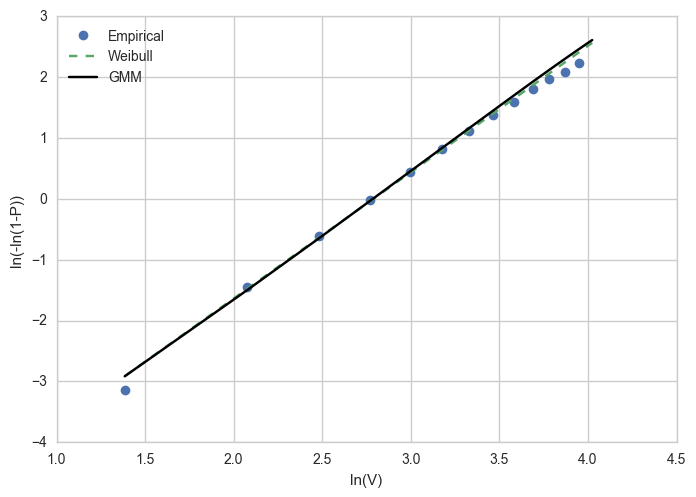

In [52]:
x = linspace(0, max_speed, 15)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(list(zip(*y_))[0])
plot(log(x), log(-log(1-y)),'-', color='black', label = 'GMM')

plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Direction Distribution Comparison


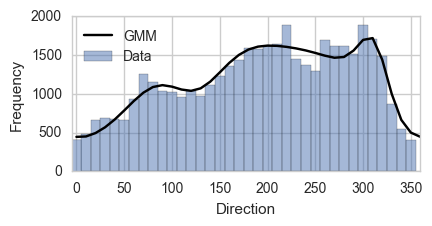

In [53]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction',ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4.5,2))
dir_fig = plt.gcf()
print(title)

Speed Distribution Comparison


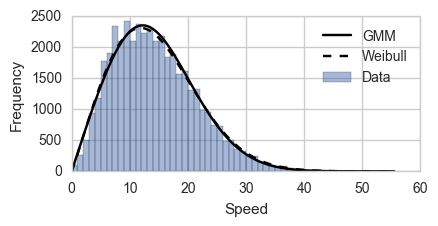

In [54]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')

# 3. Weibull
y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', color='black', label='Weibull')   
title='Speed Distribution Comparison'
plt_configure(xlabel='Speed',ylabel='Frequency',legend=True, figsize=(4.5, 2))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)
print(title)

In [55]:
# %%time
incre = SECTOR_LENGTH 
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# #This R square is compute as in paper 
# # Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# # http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.899583812352


## 5.3 Sectoral Comaprison

In [56]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)
        
        fig = plt.figure(figsize=(13,1.3))
        x = linspace(0, sub_max_speed, 20)
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], 
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        # 1.3 Weibull Distribution
        y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(list(zip(*y_))[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)      
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        plt.gca().set_xlim(right = log(max_speed+1))
        
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle)     )

        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'],bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                    for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_ ))[0])/direction_prob[0]
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.exponweib.cdf(bins[1:], *weibull_params) - sp.stats.exponweib.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff, diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob[0], 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.show()
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()])
        print(' ')
    return max_diff_array, curve_collection

5.0 (-5.0 - 15.0) degree


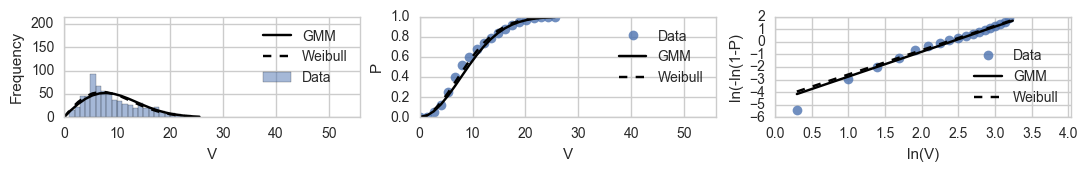

data size: 674 weight 0.015734061675654224
GMM Weibull
R square 0.727684625237 0.776272999663
max diff: 0.097841283291 0.0573770748876 speed value: 8.07457448749 y gmm 0.416995511961
 
25.0 (15.0 - 35.0) degree


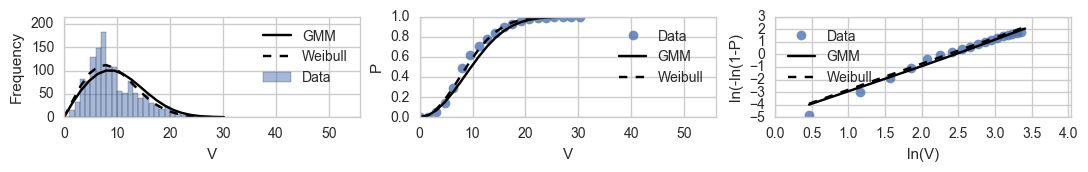

data size: 1348 weight 0.03146812335130845
GMM Weibull
R square 0.755934080095 0.836645732063
max diff: 0.130277757796 0.0646773658877 speed value: 9.543084561 y gmm 0.484707405409
 
45.0 (35.0 - 55.0) degree


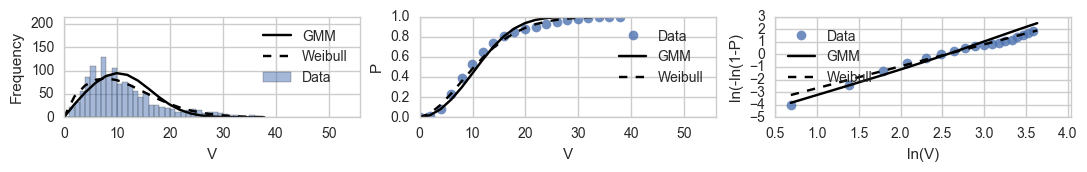

data size: 1339 weight 0.031258024604897634
GMM Weibull
R square 0.791604566518 0.867643450199
max diff: 0.0986815566147 0.0538037465428 speed value: 9.95405741365 y gmm 0.43455219992
 
65.0 (55.0 - 75.0) degree


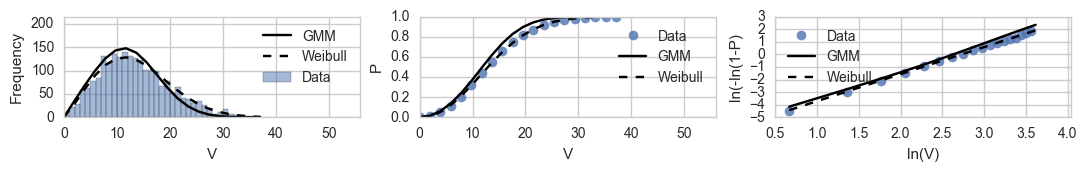

data size: 2180 weight 0.05089058524173028
GMM Weibull
R square 0.928470381529 0.973635429559
max diff: 0.0797230650179 0.0114112884579 speed value: 17.5760359955 y gmm 0.827429487036
 
85.0 (75.0 - 95.0) degree


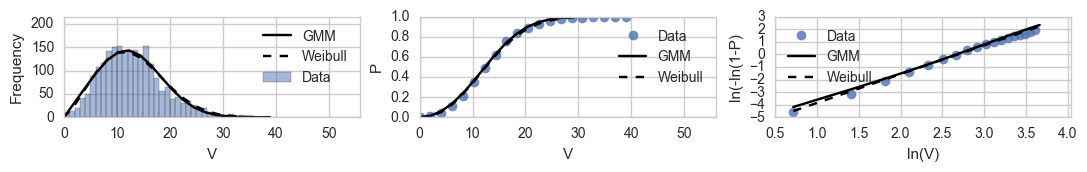

data size: 2183 weight 0.05096061815720055
GMM Weibull
R square 0.961636889281 0.961295469563
max diff: 0.0253672002312 0.0332674586671 speed value: 6.14599002175 y gmm 0.136223819562
 
105.0 (95.0 - 115.0) degree


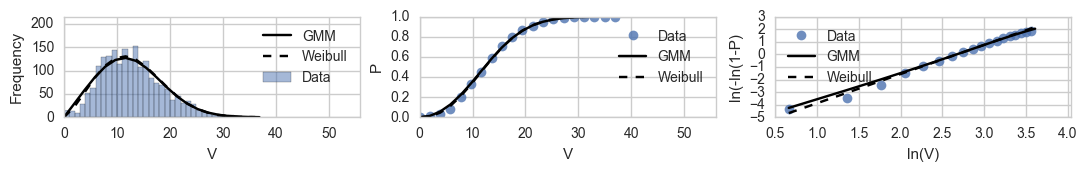

data size: 1983 weight 0.046291757125849146
GMM Weibull
R square 0.935606219177 0.947254807422
max diff: 0.0411161671486 0.0274410322215 speed value: 5.82471296523 y gmm 0.127349147481
 
125.0 (115.0 - 135.0) degree


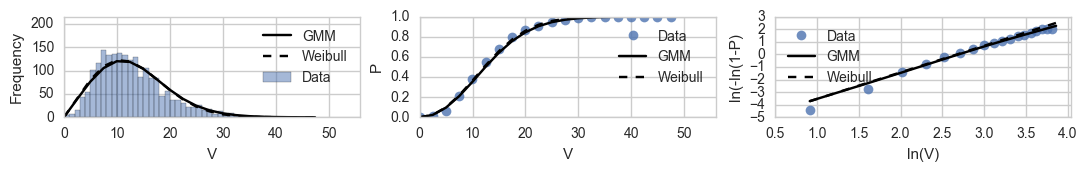

data size: 2007 weight 0.046852020449611315
GMM Weibull
R square 0.94098377319 0.947183626248
max diff: 0.0455491749567 0.0354830573033 speed value: 12.4717137264 y gmm 0.501536026837
 
145.0 (135.0 - 155.0) degree


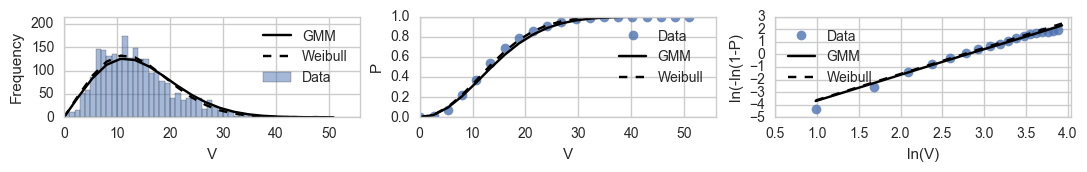

data size: 2353 weight 0.054929150033849246
GMM Weibull
R square 0.921199910028 0.937606641547
max diff: 0.0643042851556 0.0314102523115 speed value: 16.0656629881 y gmm 0.620353598397
 
165.0 (155.0 - 175.0) degree


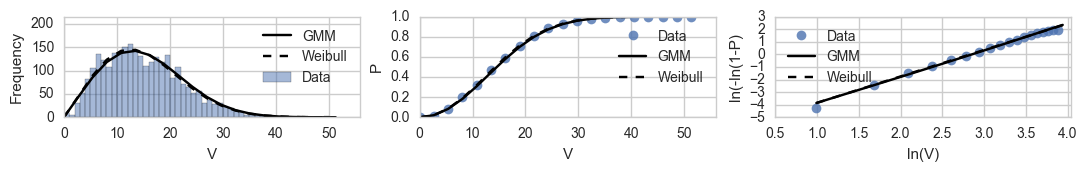

data size: 2785 weight 0.06501388986156827
GMM Weibull
R square 0.963351987089 0.966669022218
max diff: 0.0206382255203 0.00838411407212 speed value: 13.4968513209 y gmm 0.445070930674
 
185.0 (175.0 - 195.0) degree


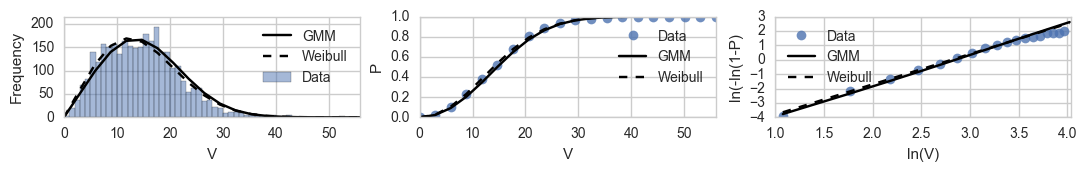

data size: 3167 weight 0.07393141443144945
GMM Weibull
R square 0.958525717816 0.962869529796
max diff: 0.0338047896162 0.0178607890615 speed value: 20.6002753298 y gmm 0.771689368893
 
205.0 (195.0 - 215.0) degree


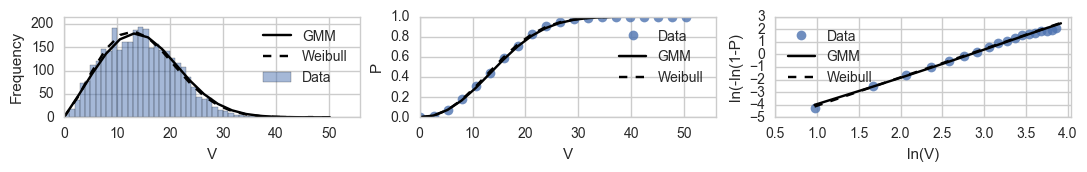

data size: 3267 weight 0.07626584494712516
GMM Weibull
R square 0.978965479036 0.978415820579
max diff: 0.0222557688227 0.0118147839898 speed value: 23.7784898891 y gmm 0.884998592977
 
225.0 (215.0 - 235.0) degree


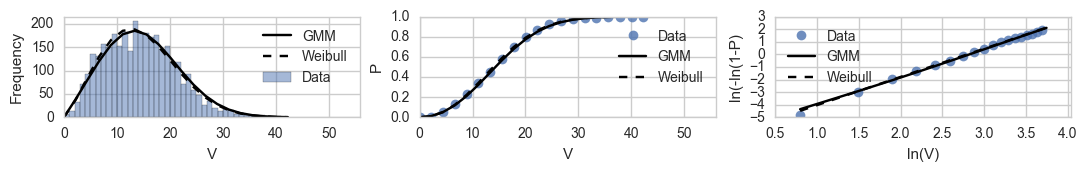

data size: 3333 weight 0.0778065690874711
GMM Weibull
R square 0.964164801868 0.966335069803
max diff: 0.0219162796711 0.0170318134261 speed value: 20.0175624705 y gmm 0.774663378295
 
245.0 (235.0 - 255.0) degree


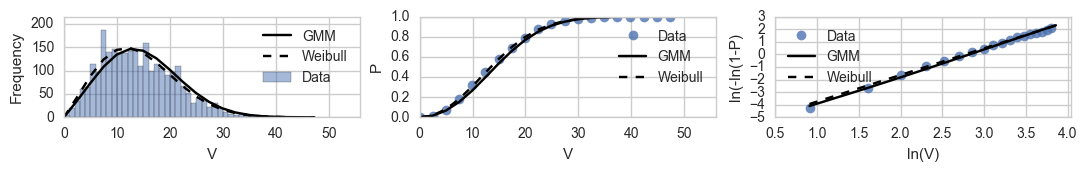

data size: 2665 weight 0.06221257324275743
GMM Weibull
R square 0.914781523265 0.939800740408
max diff: 0.0559464718068 0.0150151575879 speed value: 9.9513911062 y gmm 0.265629513184
 
265.0 (255.0 - 275.0) degree


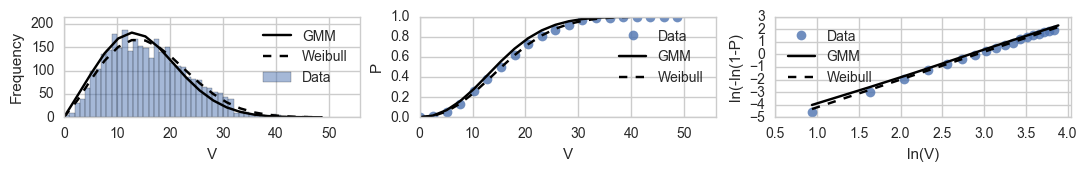

data size: 3307 weight 0.07719961715339543
GMM Weibull
R square 0.940098087294 0.965101596371
max diff: 0.0652275872985 0.0160553675524 speed value: 17.9332449096 y gmm 0.681496108617
 
285.0 (275.0 - 295.0) degree


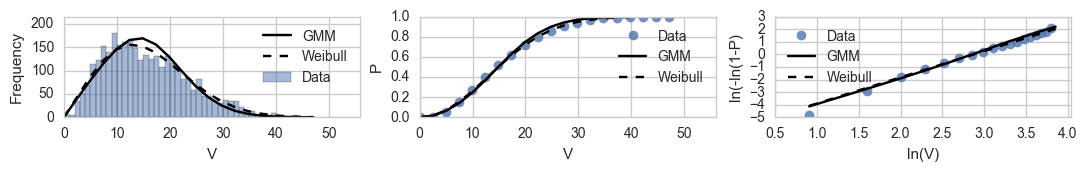

data size: 3132 weight 0.07311436375096295
GMM Weibull
R square 0.913733337286 0.955390003275
max diff: 0.0398133737582 0.0236410882947 speed value: 24.7825215366 y gmm 0.898689491255
 
305.0 (295.0 - 315.0) degree


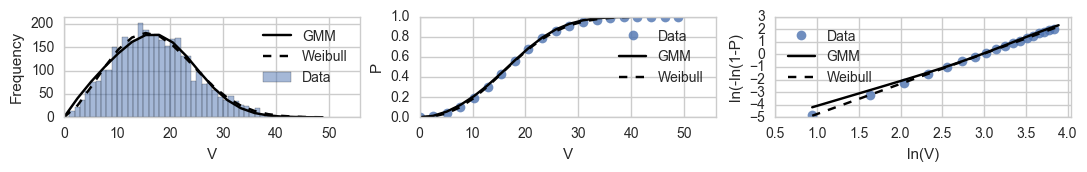

data size: 3596 weight 0.08394612134369821
GMM Weibull
R square 0.97036342445 0.979867452654
max diff: 0.0239870182598 0.00945523411751 speed value: 7.70873475034 y gmm 0.122985905913
 
325.0 (315.0 - 335.0) degree


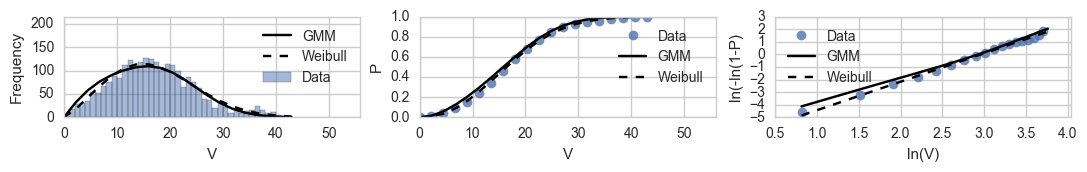

data size: 2358 weight 0.05504587155963303
GMM Weibull
R square 0.923001165954 0.947371240645
max diff: 0.057227720001 0.0193882860915 speed value: 11.3094177819 y gmm 0.297261647058
 
345.0 (335.0 - 355.0) degree


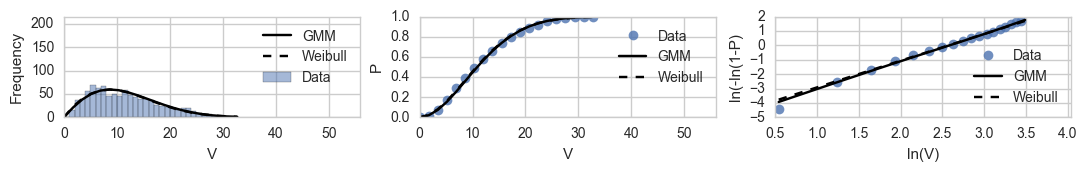

data size: 950 weight 0.02217708989891916
GMM Weibull
R square 0.906929780597 0.910793160087
max diff: 0.0373476120715 0.0282657022465 speed value: 6.8855708088 y gmm 0.252126072139
 
Wall time: 2min 45s


In [57]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.9306464307943831 0.9498549397000967


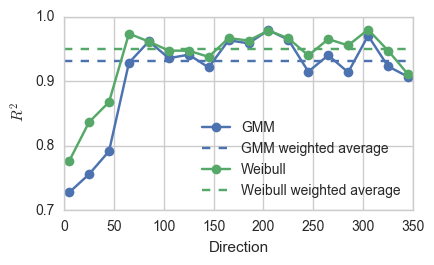

In [58]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$")
print(gmm_mean, weibull_mean)

0.046533892249114535 0.022144287041918332


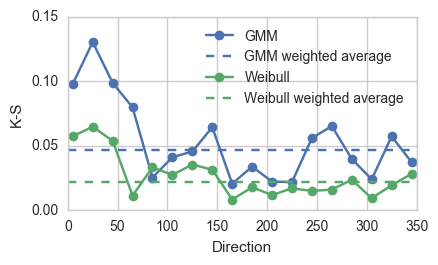

In [59]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S")
ylim = max(plt.gca().get_ylim()[1],0.15)
plt.gca().set_ylim(top=ylim)
print(gmm_mean, weibull_mean)

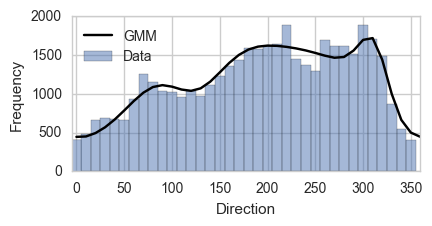

In [60]:
# Compare direction weight with previous figure
display(dir_fig)

### 5.3.1 Data Variability, by Bootstrap (Resampling)

In [61]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

In [62]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)

25.0 (15.0 - 35.0) Degree Speed Distribution
0.150879336305 8.5 0.406984165179


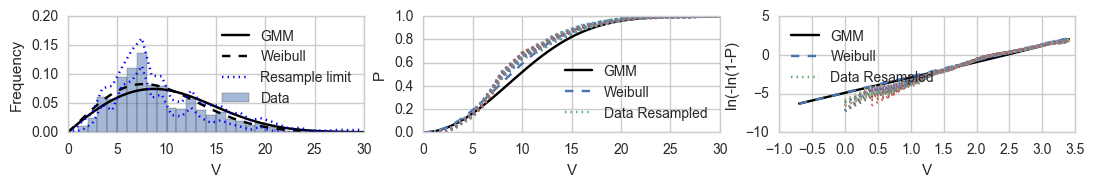

In [63]:
fig = plt.figure(figsize=(13,1.5))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

x = arange(0, sub_max_speed, 0.5)

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02  
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(list(zip(*y_gmm_cdf_))[0])/direction_prob[0]
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_gmm_cdf,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color = 'black',label='GMM')

# 3. Weilbull 
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_weibull_cdf,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
        plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel='V',ylabel='ln(-ln(1-P)',legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
plt_configure(ax=ax1, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)

diff = abs(y_ecdf - y_gmm_cdf)
print(diff.max(), x[diff.argmax()], y_gmm_cdf[diff.argmax()])

### 5.3.2 Time Variability

In [64]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))
 
x = arange(0, sub_max_speed, 0.5)

# 1. GMM
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],
                         [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(list(zip(*y_gmm_cdf_))[0])/direction_prob[0]

ax2.plot(x, y_gmm_cdf,'-', color='black', label = 'GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color='black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax2.plot(x, y_weibull_cdf,'--', label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
ax1.set_zlim(bottom = 0)
align_figures()

D:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


25.0 (15.0 - 35.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAG+CAYAAAADVbVjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsnXm4E/W9/98z2SbJWT0KWAR3OSgCZXFFEbVWe7116W2r
vbd6tV7t1bb6e7QqVgWxRUS9j1632mqxV6zWaqmVPtZWsAu2BTfADSgqKCqbnHOSk32W3x/hO0wm
M5NJMjOZJJ/X8/jgmSQz881Mvt/3fFZOURQFBEEQBEEQRNvAN/oECIIgCIIgCG8hAUgQBEEQBNFm
kAAkCIIgCIJoM0gAEgRBEARBtBkkAAmCIAiCINoMEoAEQRAEQRBtBglAgiAIgiCINoMEIEEQBEEQ
RJtBApAgCIIgCKLNIAFIEARBEATRZpAAJAiCIAiCaDNIABIEQRAEQbQZJAAJgiAIgiDaDBKABEEQ
BEEQbQYJQIIgCIIgiDaDBCBBEARBEESbQQKQIAiCIAiizSABSBAEQRAE0WaQACQIgiAIgmgzSAAS
BEEQBEG0GSQACYIgCIIg2gwSgARBEARBtA2ZTAZ33303zjjjDEyaNAnHHHMMvve972Hjxo0AgFWr
VqG/vx9f+MIXDD////7f/0N/fz9eeeUVAMA3v/lN9Pf349lnny177/vvv4/+/n5ccMEF7g2oRkgA
EgRBEATRFqTTaZx33nl4/vnncd111+H3v/89fvaznyEej+O8887Dxx9/rL5369atqihkFAoFrFix
AhzHlWwPhUJYvnx52fFefPHFsvf6BRKABEEQBEG0Bffddx8GBgbwzDPP4KSTTsK+++6Lww8/HLfd
dhsmTpyIRYsWqe+dPn16maj7+9//joMPPrhsv9OnT8fLL78MURRLtr/44ouYPHmyO4OpExKABEEQ
BEG0PIqi4De/+Q0uvvhidHR0lL2+cOFCXHvttQAAjuNwyimnYNmyZSXvefHFF3HaaaeVfXby5MmI
RCL4xz/+oW7bvn07Nm/ejKOPPtrhkThDsNEnQBAEQRBE8zM0NIR169Z5esz+/n50d3fbeu+HH36I
Xbt2YcqUKYav77333iV/n3zyyfjRj36EXbt2Ya+99oKiKFi+fDl+8YtfYOHChSXv5XkeJ510EpYv
X44ZM2YAKIrFE088EcGgP6WWP8+KIAiCIIimYWhoCAcccAAGBwc9PW5PTw82bdpkSwQODAyA4zj0
9PSo2/7+97/j8ssvV//eb7/9cNNNNwEA9t13X4wbNw7Lly/Hv/3bv+GNN95Ab28vxo4da7j/k08+
GbfeeituvvlmAMCyZcvw9a9/HRs2bKhniK5BLmCCIAiCIFqerq4uKIqCRCKhbpsyZQp++9vf4re/
/S2uuOIKpNPpks+ccsopahzgsmXLTDODAeD444/H4OAg3n33XSSTSaxZswYnnHCCO4NxALIAEgRB
EARRF93d3di0aZOvXcD7778/enp68MYbb2DChAkAgEgkgjFjxgAA+vr6yj5zyimn4JFHHkE2m8WL
L76Ie+65x3T/giDguOOOw7Jly3DAAQfgqKOOQjQarWFU3kACkCAIgiCIuunu7vZtwgMABAIBfOUr
X8HPf/5znHvuuYjH4yWvb926tewz48ePR29vLx5//HGIooj+/n7LY5xyyin4xS9+gbFjx1paC/0A
uYAJgiAIgmgLvvvd72LvvffGeeedhxdeeAFbtmzB2rVrcdNNN+G+++7D9OnTARQzhhknn3wyHnjg
AZx66qkV9z9r1iysX78eL7/8MmbNmuXaOJyALIAEQRAEQbQFgiBg8eLF+PnPf44HH3wQmzdvRjgc
xsSJE3Hvvffi5JNPxqpVq0qKN59yyil4/PHHSwQgx3Hqe7Tv3WuvvTBp0iQEg8GSZBM/wilamUsQ
BEEQBEG0POQCJgiCIAiCaDNIABIEQRAEQbQZJAAJgiAIgiDaDEoCIQjCEkVRkMvloCgKgsEgAoFA
SQA0QRAE0XxQEghBEIYoigJRFCFJEmRZhiiK6naO46AoChRFQSAQgCAICAaDJAoJgiCaBLIAEgRR
gqIoGBgYgCzLiEQiCIfDAFBW8iCbzUKSJAQCAciyrFoFeZ5X/9VaDAmCIAj/QAKQIAgApRa/XC4H
AAgGg1AUBYVCAbIsq+JOL+h4fk84sSzLAABRFJHL5UqEIc/zCAQC6r8kDAmCIBoDCUCCaHO0wg8o
LWoqiiIGBwehjxTheV7dpiiKKg616IWiLMuQZRmFQqFkP0wcBgIB1Y1MwpAgCMJdKAaQINoUM+HH
XMDVorXyaf+zI+aMBKbWYsishgRBEIQz0IxKEG0Gc+nmcjlIkqRa3BRFQTabxeDgYMn7A4EAYrEY
YrEYIpEIQqEQAoGA4X4lSVL3nclkkEqlkEqlkMlkkMvlUCgUIElSmeBj56A9F0mSkM/nkclkMDw8
jGQyiVQqhXQ6jWw2C1EUy/ZDEARhxmWXXYYf/OAHJduWLl2K/v5+3HfffSXbH3jgAZxzzjmW+1u1
ahXGjx8PAPj444/R39+PTz75pKZzmz17NmbPng0AuO+++/DNb36zpv1UA7mACaJNsLL4McGmF1Sh
UAgdHR2QZRmSJJVY4TKZjCogw+Gw6uKVZblkP0zMseMyzKyFWouh3npoFV/IcZxqLaT4QoIg9Eyd
OhXPPfdcybZVq1Zh5MiRWLlyJb7zne+o29esWYOjjjrKcn9TpkzBihUr1L+dnHO8mL/IAkgQLU4l
i9/Q0BDS6bQq2rTWPa2QMrLasX9DoRAikQii0Sji8Tji8TgEQUA4HEYwGDR037LSMvl8HtlsFul0
usTCl8/nIYqiKvr0x9a6l5lAzeVySKVSGB4exvDwsGp9zOfzZcKUIIj2Ytq0aXj//feRyWTUbStX
rsTFF1+MNWvWIJ/Pq9tXr16N6dOnW+4vGAyir6/PtfN1GxKABNGi2BV+TGAFAgF0dHSgq6ur7qdP
juMQDAYRDochCAJisRji8ThisVjNwrCSG5kdl+2TJacUCgVks1nVjcyEYTabVbObSRgSROtz5JFH
IhgM4u233wYAbN26FZ988gm+9rWvoaOjA6+99hoA4IMPPkAymcT06dORTCbx/e9/H1OnTsWJJ56I
H/7wh6pQXLVqFfr7+9X9K4qC559/HjNnzsTUqVNx8803q0lvS5Yswcknn1xyPt/85jfLXM9eQi5g
gmgxKrl6s9lsiVUtEAggGo0iFAqVWPVYoWen0Lpr9efL3MTVupHtJJ7oxaz2eOxv5j6m+oUEUR8r
V1q/fsghgJXR7LPPgI0brfdx9NHVnxdQDGmZOHEi1q5di2nTpmHlypWYMGECotGo+vexxx6LNWvW
4NBDD0V3dze++93vQpZl/PKXv0Qmk8GPfvQjzJs3Dz/84Q8BlM8vTz31FO655x6Ioojvf//7eOih
h1TXst/mExKABNEiOCH8GoGVMNQKQrfiC7VuZGBPfCFzP/M8j2g0SvGFBGGDY46xfv2pp4CvftX8
9eXLga99zXof9TyXTp8+HWvXrgVQdP8evVtNHn300Vi6dCmAPe7fjz76CMuWLcOqVavQ0dEBALjl
lltwzjnn4Prrrzfc/w9+8ANMnjwZAHDllVfizjvvLIkt9BMkAAmiyWHCj4kjrfBjWbR+FH6V0CZ1
aDGyFurjBI22AcbC0Kx+IXNF8zwPSZLUrGOjwtZUv5AgmoNp06bhN7/5DYCiAGSWvKOOOgq33347
8vk8Vq9ejcsvvxzvvfceZFnGCSecULafDz/8sGwbx3E48sgj1b8PP/xwfPbZZ0gmky6Npj5IABJE
k2Ik/Jjrtl7hV42Q8Tp+jsUX6s/BzGKoxWibmRvZ6Lj6wtas7A3DrA0eCUOiXfjHP6xfP+QQ69dP
PrnyPurh85/

### 5.3.3 Adjacent Sector Variability

In [65]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [66]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('angle == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['data_size'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


25.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAG+CAYAAAADVbVjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsnXm4FNWZ/79VvXffDS6LSLhuqBeCQBBQRDCik+g8mkSJ
UTNjokkefX6CJhNNoomaicboaDKJAWESTTTjknEhxmVGnQjZ3ICRzShGERcQ2RRu9+3l9lL1++N6
iurqqurq7jrVp7rfz/P44O3l9OnTVae+9a6SqqoqCIIgCIIgiLZBbvYECIIgCIIgCG8hAUgQBEEQ
BNFmkAAkCIIgCIJoM0gAEgRBEARBtBkkAAmCIAiCINoMEoAEQRAEQRBtBglAgiAIgiCINoMEIEEQ
BEEQRJtBApAgCIIgCKLNIAFIEARBEATRZpAAJAiCIAiCaDNIABIEQRAEQbQZJAAJgiAIgiDaDBKA
BEEQBEEQbQYJQIIgCIIgiDaDBCBBEARBEESbQQKQIAiCIAiizSABSBAEQRAE0WaQACQIgiAIgmgz
SAASBEEQBEG0GSQACYIgCIIg2gwSgARBEARBtA3ZbBY/+9nPcPrpp2PatGk4/vjjcfnll2PLli0A
gDVr1qC/vx//8A//YPr+f/mXf0F/fz/Wrl0LALjgggvQ39+PRx99tOK1W7duRX9/P770pS/x+0J1
QgKQIAiCIIi2IJPJ4LzzzsOTTz6J73znO3jqqafw61//GolEAueddx7ee+897bU7d+7URCGjUCjg
2WefhSRJZY+HQiGsWrWq4vOeeeaZiteKAglAgiAIgiDagqVLl2Lfvn1YsWIFPvnJT2LcuHGYPHky
brrpJkydOhV33XWX9tpZs2ZViLoXXngBRxxxRMW4s2bNwnPPPYdisVj2+DPPPIPp06fz+TINQgKQ
IAiCIIiWR1VV/P73v8dXvvIVdHR0VDx/yy234Nvf/jYAQJIknHLKKVi5cmXZa5555hl86lOfqnjv
9OnTEYlE8OKLL2qP7d69G++88w6OO+44l7+JOwSbPQGCIAiCIPzPwMAAXnvtNU8/s7+/H93d3Y5e
++677+LDDz/EjBkzTJ8fNWpU2d8LFizAjTfeiA8//BAjR46EqqpYtWoV7r//ftxyyy1lr5VlGZ/8
5CexatUqnHjiiQCGxeL8+fMRDIoptcScFUEQBEEQvmFgYACHHnoo9u/f7+nn9vT04O2333YkAvft
2wdJktDT06M99sILL+DSSy/V/v7Yxz6Ga6+9FgAwbtw4HH300Vi1ahU+//nPY/369RgxYgT6+vpM
x1+wYAFuuOEGXHfddQCAlStX4txzz8Xrr7/eyFfkBrmACYIgCIJoebq6uqCqKpLJpPbYjBkz8Nhj
j+Gxxx7DokWLkMlkyt5zyimnaHGAK1eutMwMBoC5c+di//792Lx5M1KpFDZu3Ih58+bx+TIuQBZA
giAIgiAaoru7G2+//bbQLuBDDjkEPT09WL9+PaZMmQIAiEQimDBhAgCgt7e34j2nnHIKfvWrXyGX
y+GZZ57BbbfdZjl+NBrFCSecgJUrV+LQQw/F7NmzEYvF6vhW3kACkCAIgiCIhunu7hY24QEAAoEA
Fi5ciN/85jc4++yzkUgkyp7fuXNnxXsmTZqEESNG4L777kOxWER/f7/tZ5xyyim4//770dfXZ2st
FAFyARMEQRAE0RZcdtllGDVqFM477zw8/fTT2L59OzZt2oRrr70WS5cuxaxZswAMZwwzFixYgGXL
luHUU0+tOv7JJ5+Mv//973juuedw8sknc/sebkAWQIIgCIIg2oJoNIp7770Xv/nNb7B8+XK88847
CIfDmDp1KpYsWYIFCxZgzZo1ZcWbTznlFNx3331lAlCSJO01+teOHDkS06ZNQzAYLEs2ERFJ1ctc
giAIgiAIouUhFzBBEARBEESbQQKQIAiCIAiizSABSBAEQRAE0WZQEghBELaoqoqhoSGoqopgMIhA
IFAWAE0QBEH4D0oCIQjCFFVVUSwWUSqVoCgKisWi9rgkSVBVFaqqIhAIIBqNIhgMkigkCILwCWQB
JAiiDFVVsW/fPiiKgkgkgnA4DAAVJQ9yuRxKpRICgQAURdGsgrIsa//qLYYEQRCEOJAAJAgCQLnF
b2hoCAAQDAahqioKhQIURdHEnVHQyfKBcGJFUQAAxWIRQ0NDZcJQlmUEAgHtXxKGBEEQzYEEIEG0
OXrhB5QXNS0Wi9i/fz+MkSKyLGuPqaqqiUM9RqGoKAoURUGhUCgbh4nDQCCguZFJGBIEQfCFYgAJ
ok2xEn7MBVwreiuf/j8nYs5MYOothsxqSBAEQbgD7agE0WYwl+7Q0BBKpZJmcVNVFblcDvv37y97
fSAQQDweRzweRyQSQSgUQiAQMB23VCppY2ezWaTTaaTTaWSzWQwNDaFQKKBUKlUIPjYH/VxKpRLy
+Tyy2SwGBweRSqWQTqeRyWSQy+VQLBYrxiEIgrDikksuwfe+972yx5544gn09/dj6dKlZY8vW7YM
Z511lu14a9aswaRJkwAA7733Hvr7+7Fjx4665nb11Vfj6quvBgAsXboUF1xwQV3j1AK5gAmiTbCz
+DHBZhRUoVAIHR0dUBQFpVKpzAqXzWY1ARkOhzUXr6IoZeMwMcc+l2FlLdRbDI3WQ6v4QvZ4MBhE
JBKh+EKCICo49thj8fjjj5c9tmbNGowdOxarV6/G4sWLtcc3btyI2bNn2443Y8YMPPvss9rfbu45
XuxfZAEkiBanmsVvYGAAmUxGE216655eSJlZ7di/oVAIkUgEsVgMiUQCiUQC0WgU4XAYwWDQ1H3L
Ssvk83nkcjlkMpkyC18+n0exWNTEnfGz9e5l/fvT6TQGBwcxODioWR/z+XyFMCUIor2YOXMmtm7d
imw2qz22evVqfOUrX8HGjRuRz+e1xzds2IBZs2bZjhcMBtHb28ttvrwhAUgQLYpT4ccEViAQQEdH
B7q6uhq++5QkCcFgEOFwGNFoFPF4HIlEAvF4vG5hWM2NzD6XjcmSUwqFAnK5nOZGZsIwl8tp2c0k
DAmi9TnmmGMQDAbxyiuvAAB27tyJHTt24Atf+AI6Ojrw0ksvAQDeeustpFIpzJo1C6lUCt/61rdw
7LHHYv78+fjhD3+oCcU1a9agv79fG19VVTz55JM46aSTcOyxx+K6667Tkt4eeeQRLFiwoGw+F1xw
QYXr2UvIBUwQLUY1V28ulyuzqgUCAcRiMYRCoTKrHiv07Bb6cjDG+TI3ca1uZDYe+z5sLDs3sv7z
2N+SJGnWTqpfSBD1s3q1/fMTJwJ2RrMPPgC2bLEf47jjap8XMBzSMnXqVGzatAkzZ87E6tWrMWXK
FMRiMe3vOXPmYOPGjTjyyCPR3d2Nyy67DIqi4IEHHkA2m8WNN96I66+/Hj/84Q8BVO4vDz74IG67
7TYUi0V861vfwi9+8QvNtSzafkICkCBaBDeEXzOwE4Z6QWgnDBmlUgnpdLqm+EL2r139QiYQ2X+i
beQEIQrHH2///IMPAuecY/38qlXAF75gP0Yj96WzZs3Cpk2bAAy7f4/7SE0ed9xxeOKJJwAccP9u
27YNK1euxJo1a9DR0QEA+MEPfoCzzjoLV111len43/ve9zB9+nQAwNe//nX8+Mc/LostFAkSgATh
Y5gAYm3agHLhx7JoRRR+1dCLLj1m1kJjnKDZY4B54omT+oUAtKxjs8LWVL+QIPzBzJkz8fvf/x7A
sABklrzZs2fj3/7t35DP57FhwwZceumlePPNN6EoCubNm1cxzrvvvlvxmCRJOOaYY7S/J0+ejA8+
+ACpVIrTt2kMEoAE4VNYjN8HH3wAAFp8nRvCrxYh43X8HIsv1JNOp6Gqqua+rUUYOq1faCYMWdkb
hr5ANstIJmF

# 6. Result Variability & Cross-Validation

In [67]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

## 6.1 Variability of the Result

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.400  -8.968   -7.960  9.915  10.388  -0.483
2  0.398  -0.317    6.273  8.232   7.819   0.014
3  0.202   6.277  -10.329  9.478   6.654  -0.584

GMM Plot Result
0.399795700717 [[-8.96790106 -7.95986926]] [  7.29151422  12.37164638] -137.756167249
0.397831685295 [[-0.31730438  6.27342201]] [ 7.81111386  8.23930491] -82.3146943175
0.202372613988 [[  6.27714446 -10.32894912]] [  4.87278164  10.50533002] -119.130090938


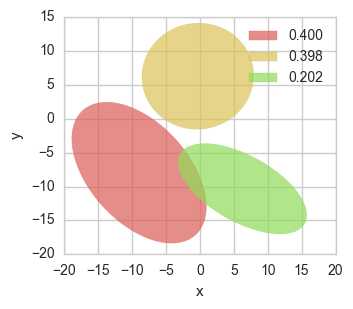

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.011      0.026  2.101118e-09      0.035       0.153

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.011      0.026  2.174200e-09      0.036       0.155

weight  mean_x  mean_y   sig_x  sig_y    corr
1  0.726  -2.764  -7.195  12.236  9.387  -0.352
2  0.249  -1.279   9.153   7.935  6.975   0.348
3  0.025   5.768   3.577   2.564  2.903  -0.094

GMM Plot Result
0.725999350826 [[-2.76372417 -7.19471665]] [  8.25223617  13.02853819] -116.343467684
0.24934471445 [[-1.27863885  9.15290896]] [ 5.93889987  8.73676649] -55.2003413401
0.0246559347237 [[ 5.76768386  3.57650123]] [ 2.51726645  2.94323929] -161.427213677


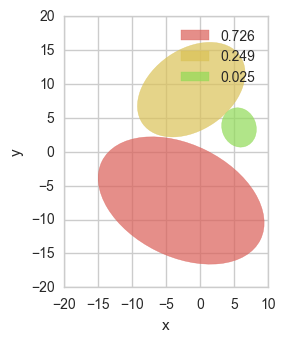

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.984  0.008      0.028  1.728224e-09      0.033       0.139

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.984  0.009      0.027  1.748559e-09      0.033       0.139


Wall time: 54.5 s


In [68]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(2))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax)
    plt.show()
    
#     fig_gmm = plt.figure(figsize=(4,3))
#     mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(result['gmm'])
#     pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)
#     plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
#     align_figures()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 6.2 Cross-validation, to select the number of Gaussian

In [69]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 32127.75 10709.25
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.074522  0.020891  8.257721e-09    0.071384     0.302859  0.924190
1    0.076097  0.020620  8.245825e-09    0.070330     0.302703  0.924061
2    0.079045  0.022428  8.555454e-09    0.071987     0.308383  0.920859
3    0.075085  0.020545  8.052903e-09    0.069168     0.299029  0.925304

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.086896  0.026875  8.970056e-09    0.071118     0.315777  0.916227
1    0.081081  0.026664  8.578833e-09    0.072691     0.308626  0.920476
2    0.071926  0.021836  7.879858e-09    0.068645     0.295644  0.928167
3    0.086596  0.021967  9.647186e-09    0.077337     0.327647  0.912844

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.031153  0.011220  2.835696e-09    0.040395     0.177604  0.973913
1    0.034145  0.010930  2.817265e-09    0.041005     0.176908  0.973908
2    0.032183  0.010891  2.634626e-09    0.040691     0.171040  0.975608
3    0.033793  0.010684  2.690598e-09    0.040654     0.172840  0.975241

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.031675  0.010359  2.985846e-09    0.043957     0.181794  0.972272
1    0.034015  0.014637  2.899731e-09    0.041824     0.179512  0.973579
2    0.048372  0.012890  3.501379e-09    0.043155     0.197387  0.968078
3    0.039216  0.012223  3.285383e-09    0.043347     0.191228  0.969483

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.064907  0.014685  2.232956e-09    0.035715     0.157426  0.979601
1    0.054645  0.015676  2.023690e-09    0.034802     0.149997  0.981304
2    0.023001  0.007804  1.800277e-09    0.033523     0.141438  0.983341
3    0.037402  0.014575  2.151765e-09    0.036484     0.154622  0.980005

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.055920  0.018196  2.342715e-09    0.039076     0.161573  0.977779
1    0.116186  0.017324  3.054132e-09    0.042355     0.184003  0.972018
2    0.030316  0.014525  2.745906e-09    0.038772     0.174611  0.974951
3    0.080105  0.017982  2.487302e-09    0.036907     0.166212  0.977561

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.018099  0.007492  1.045340e-09    0.024703     0.107773  0.990329
1    0.017450  0.007180  1.035780e-09    0.025556     0.107324  0.990384
2    0.018852  0.008336  1.050599e-09    0.025501     0.108032  0.990315
3    0.017845  0.007726  1.114692e-09    0.025282     0.111229  0.989785

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.024915  0.009651  1.695023e-09    0.031517     0.137203  0.984529
1    0.027312  0.011472  1.711812e-09    0.030200     0.137708  0.984535
2    0.022608  0.007742  1.597393e-09    0.029077     0.133235  0.985255
3    0.021367  0.011303  1.537203e-09    0.032411     0.130877  0.985567

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.013776  0.007616  7.012504e-10    0.020608     0.088267  0.993493
1    0.012873  0.009363  6.890141e-10    0.020587     0.087449  0.993640
2    0.014523  0.007096  7.277630e-10    0.020820     0.089965  0.993284
3    0.013616  0.008996  8.123730e-10    0.022042     0.094997  0.992543

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.021692  0.011096  1.404140e-09    0.028846     0.124891  0.987291
1    0.017958  0.007801  1.477031e-09    0.028369     0.128288  0.986425
2    0.021848  0.011555  1.326773e-09    0.028832     0.121221  0.987796
3    0.019162  0.016583  1.236188e-09    0.027606     0.117209  0.988446

Wall time: 10min 49s


In [70]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.076187  0.021121  8.277976e-09    0.070717     0.303243  0.923603
2    0.032819  0.010931  2.744546e-09    0.040686     0.174598  0.974668
3    0.044989  0.013185  2.052172e-09    0.035131     0.150871  0.981063
4    0.018061  0.007684  1.061603e-09    0.025261     0.108589  0.990203
5    0.013697  0.008268  7.326001e-10    0.021014     0.090170  0.993240

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.081625  0.024336  8.768983e-09    0.072448     0.311923  0.919429
2    0.038320  0.012527  3.168085e-09    0.043071     0.187480  0.970853
3    0.070632  0.017007  2.657514e-09    0.039278     0.171600  0.975577
4    0.024051  0.010042  1.635358e-09    0.030801     0.134756  0.984971
5    0.020165  0.011759  1.361033e-09    0.028413     0.122902  0.987489

D:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


R_square


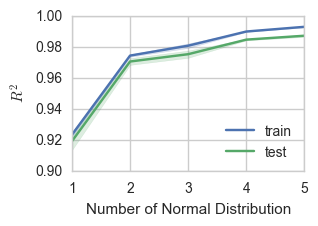

K_S


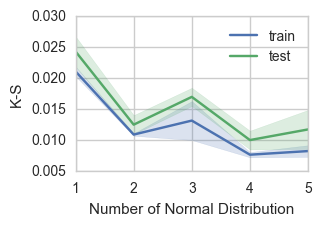

Chi_square


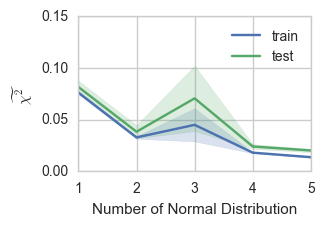

In [71]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Normal Distribution', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    plt.show()

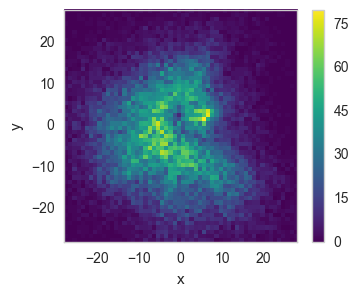

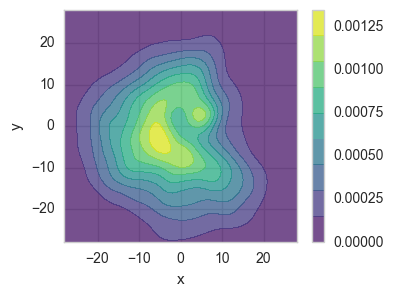

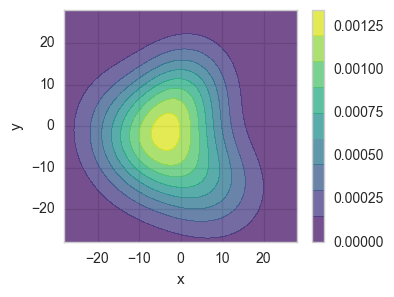

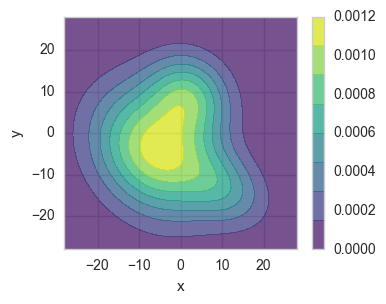

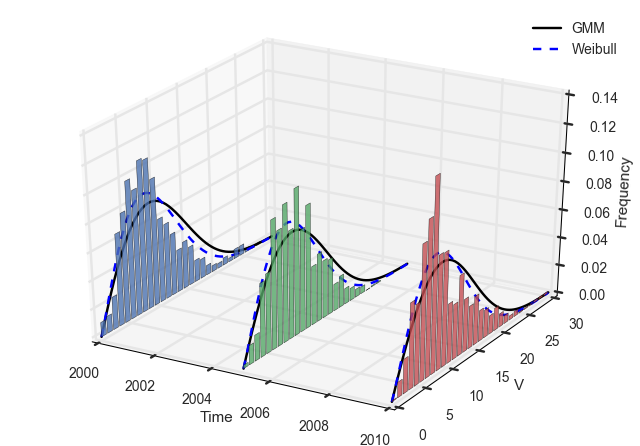

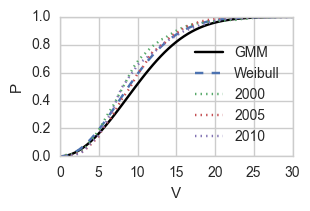

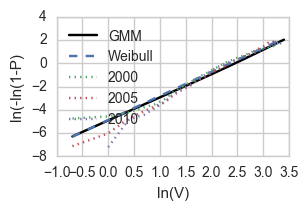

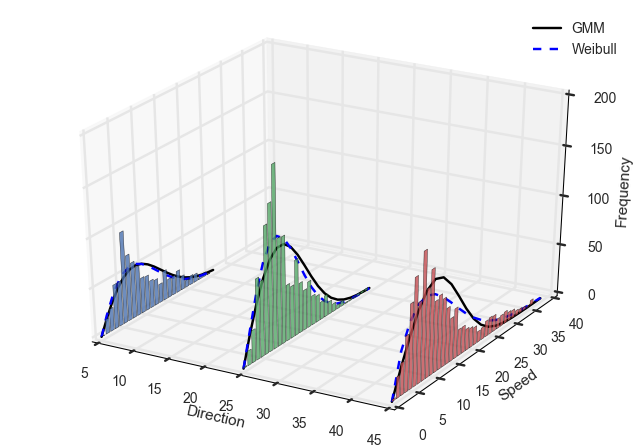

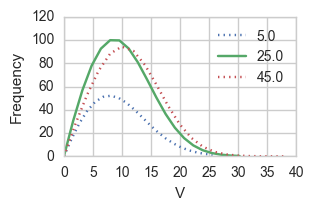

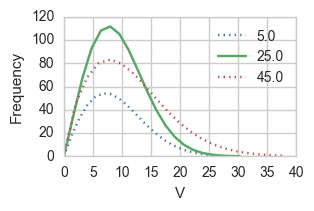

In [72]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [73]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)